# Spotify Dataset 1921-2020, 160k+ Tracks


https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

Primary
<ul><li> id (Id of track generated by Spotify):The index of track (Arbitrarily ordered)</li></ul>
Numerical
<ul>
    <li>acousticness [0, 1]: The relative metric of the track being acoustic</li>
    <li>danceability [0, 1]: The relative measurement of the track being danceable</li>
    <li>energy [0, 1]: The energy of the track</li>
    <li>duration_ms (Integer typically ranging from 200k to 300k)</li>
    <li>instrumentalness [0, 1]: The relative ratio of the track being instrumental</li>
    <li>valence [0, 1]: The positiveness of the track</li>
    <li>popularity [0, 100]: The popularity of the song lately, default country = US</li>
    <li>tempo (Float typically ranging from 50 to 150): The tempo of the track in Beat Per Minute (BPM)</li>
    <li>liveness [0, 1]: The relative duration of the track sounding as a live performance</li>
    <li>loudness (Float typically ranging from -60 to 0): Relative loudness of the track in the typical range [-60, 0] in decibel (dB)</li>
    <li>speechiness [0, 1]: The relative length of the track containing any kind of human voice</li>
    <li>year [1921, 2020]</li>
</ul>
Dummy
<ul>
    <li>mode (0 = Minor, 1 = Major): The binary value representing whether the track starts with a major (1) chord progression or not (0)</li>
    <li>explicit (0 = No explicit content, 1 = Explicit content): The binary value whether the track contains explicit content or not</li>
</ul>
Categorical
<ul>    
    <li>key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)</li>
    <li>artists (List of artists mentioned): The list of artists credited for production of the track</li>
    <li>release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)</li>
    <li>name (Name of the song)</li>
</ul>

# Pre-Processing dei Dati

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set()

In [4]:
data_in = pd.read_csv('data.csv', index_col=0)
data_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168592 entries, 0 to 168591
Data columns (total 19 columns):
acousticness        168592 non-null float64
artists             168592 non-null object
danceability        168592 non-null float64
duration_ms         168592 non-null int64
energy              168592 non-null float64
explicit            168592 non-null int64
id                  168592 non-null object
instrumentalness    168592 non-null float64
key                 168592 non-null int64
liveness            168592 non-null float64
loudness            168592 non-null float64
mode                168592 non-null int64
name                168592 non-null object
popularity          168592 non-null int64
release_date        168592 non-null object
speechiness         168592 non-null float64
tempo               168592 non-null float64
valence             168592 non-null float64
year                168592 non-null int64
dtypes: float64(9), int64(6), object(4)
memory usage: 25.7+ MB


Heatmap distribuzione variabili

### Rimozione dei duplicati

In [5]:
df = data_in.copy(deep=True)

original_size = df.shape[0]

col = [c for c in df.columns if c != 'id']

df.drop_duplicates(subset=col, inplace=True)

print('Rimosse %d righe duplicate' % (original_size - df.shape[0]))

Rimosse 674 righe duplicate


In [6]:
df.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921


Controllo che la variabile 'release_date' sia un duplicato della variabile year

In [7]:
df['release_date_mod'] = [int(rd.split('-')[0]) for rd in df['release_date']]

In [8]:
df[df['release_date_mod'] != df['year']]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,release_date_mod


Conversione degli attributi interi in float

In [9]:
df[['duration_ms', 'popularity','year', 'key']] = df[['duration_ms', 'popularity','year', 'key']].astype('float')

In [10]:
print('Numero di Record: {}\nNumero di Feature: {}'.format(df.shape[0], df.shape[1]))

Numero di Record: 167918
Numero di Feature: 20


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167918 entries, 0 to 168591
Data columns (total 20 columns):
acousticness        167918 non-null float64
artists             167918 non-null object
danceability        167918 non-null float64
duration_ms         167918 non-null float64
energy              167918 non-null float64
explicit            167918 non-null int64
id                  167918 non-null object
instrumentalness    167918 non-null float64
key                 167918 non-null float64
liveness            167918 non-null float64
loudness            167918 non-null float64
mode                167918 non-null int64
name                167918 non-null object
popularity          167918 non-null float64
release_date        167918 non-null object
speechiness         167918 non-null float64
tempo               167918 non-null float64
valence             167918 non-null float64
year                167918 non-null float64
release_date_mod    167918 non-null int64
dtypes: float64(13)

Rimozione dal dataset le colonne contenenti stringhe e la release_date che falserebbe la predizione

In [12]:
column_to_remove = ['artists', 'id', 'name', 'release_date', 'release_date_mod'] 

df.drop(columns=column_to_remove, axis=1, inplace=True)

Grafici distribuzioni variabili

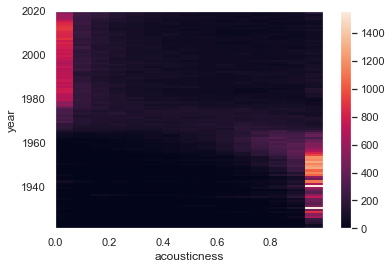

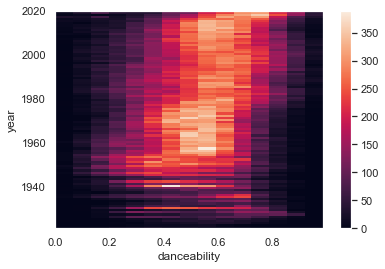

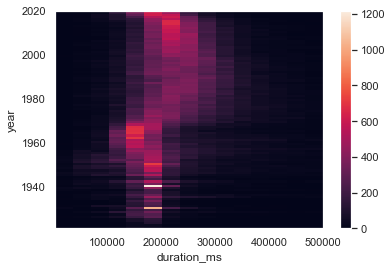

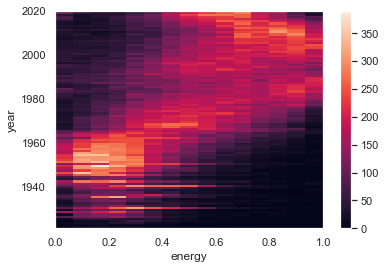

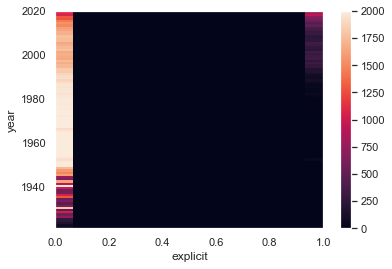

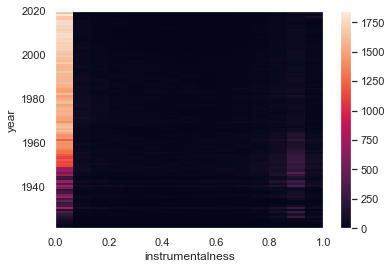

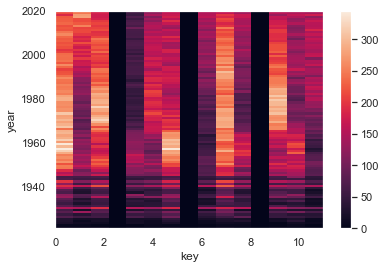

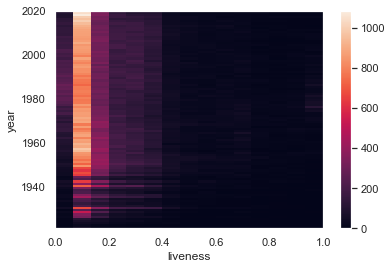

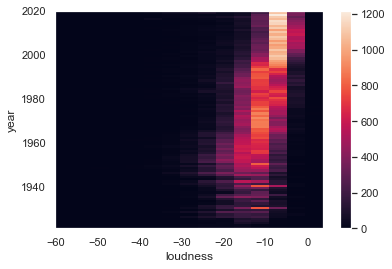

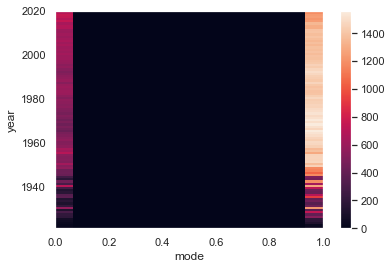

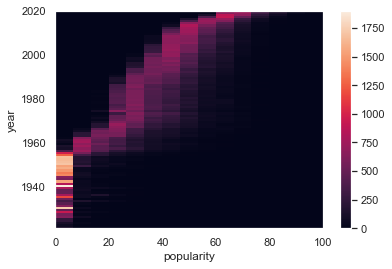

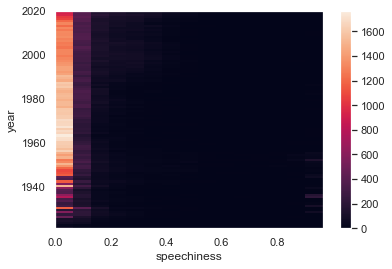

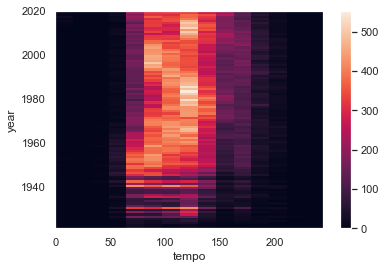

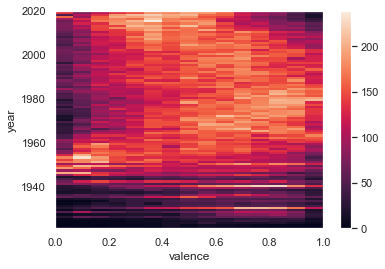

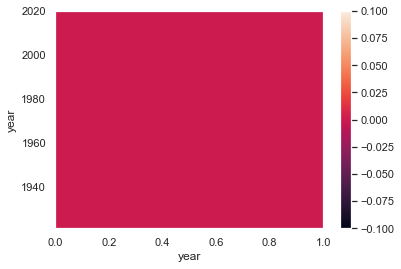

In [13]:
years = df['year'].unique()

for feature in df.columns:

    if feature != 'year':

        feature_values = df[[feature, 'year']]
    
        feature_min = feature_values.min()[0]
        feature_max = feature_values.max()[0]

    if feature == 'duration_ms':
        feature_max = 5e5

    feature_range = np.linspace(feature_min, feature_max, num=15+1)

    matrix = []

    for year in years:
        feature_hist, feature_bins = np.histogram(feature_values[feature_values['year']== year][feature], bins=15, range=(feature_min, feature_max))
        matrix.append(feature_hist)

   

    X,Y = np.meshgrid(feature_range, years)


    plt.figure()
    plt.xlabel(feature)
    plt.ylabel('year')
    # Plot the density map using nearest-neighbor interpolation
    plt.pcolormesh(X,Y,matrix)
    plt.colorbar()
    plt.show()


Nota: abbiamo provato togliendo la variabile più correlata ('popularity') con la variabile target per vedere se influenzava negativamente il peso delle altre ma la performance è molto peggiore. L'RMSE si raddoppia

In [14]:
df.head(2)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.732,0.819,180533.0,0.341,0,0.000,7.0,0.160,-12.441,1,8.0,0.4150,60.936,0.9630,1921.0
1,0.982,0.279,831667.0,0.211,0,0.878,10.0,0.665,-20.096,1,5.0,0.0366,80.954,0.0594,1921.0


## Divido il dataset in Training set (80%) e Test set (20%)

In [15]:
labels = df['year']

columns = [c for c in df.columns if c != 'year']
X = df[columns]

In [16]:
X.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.732,0.819,180533.0,0.341,0,0.000000,7.0,0.160,-12.441,1,8.0,0.4150,60.936,0.9630
1,0.982,0.279,831667.0,0.211,0,0.878000,10.0,0.665,-20.096,1,5.0,0.0366,80.954,0.0594
2,0.996,0.518,159507.0,0.203,0,0.000000,0.0,0.115,-10.589,1,6.0,0.0615,66.221,0.4060
3,0.982,0.279,831667.0,0.211,0,0.878000,10.0,0.665,-20.096,1,4.0,0.0366,80.954,0.0594
4,0.957,0.418,166693.0,0.193,0,0.000002,3.0,0.229,-10.096,1,4.0,0.0380,101.665,0.2530


In [17]:
ts = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, labels, train_size=ts, 
                                                    random_state=42)

In [18]:
print('TRAIN SET:\nnumero di record: {}\nnumero di attributi: {}'
      .format(X_train.shape[0], X_train.shape[1]))
print('TEST SET:\nnumero di record: {}\nnumero di attributi: {}'
      .format(X_test.shape[0], X_test.shape[1]))

TRAIN SET:
numero di record: 134334
numero di attributi: 14
TEST SET:
numero di record: 33584
numero di attributi: 14


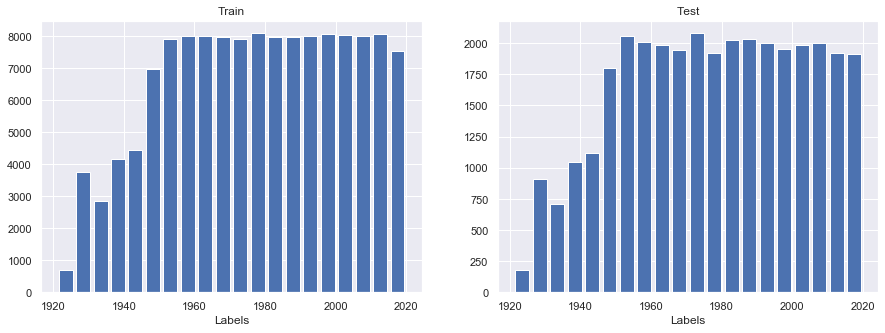

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(y_train, bins=20, rwidth=0.8)
plt.xlabel('Labels')
plt.title('Train')

plt.subplot(122)
plt.hist(y_test, bins=20, rwidth=0.8)
plt.xlabel('Labels')
plt.title('Test')

plt.show()

### Standardizzazione con StandardScaler()

In [20]:
def dummies_numerics_data_split(dummies_columns, X_df):
  
  dummies_variables_list = np.array(X_df[dummies_columns].copy())
  X_df.drop(columns=dummies_columns, axis=1, inplace=True)

  return dummies_variables_list, X_df

def scaler_data(scaler, X_df, dummies_variables_list):

  tmp_X_norm = scaler.transform(X_df)

  X_norm = list()

  for dummies, numerics in zip(dummies_variables_list,tmp_X_norm):

     numerics = np.append(numerics, dummies)
     X_norm.append(numerics)

  return np.array(X_norm)

In [21]:
dummies_columns = ['explicit', 'mode'] # standardizzo anche key

X_df_train= X_train.copy()
X_df_test= X_test.copy()

dummies_variables_list_train, X_df_train = dummies_numerics_data_split(dummies_columns, X_df_train)
dummies_variables_list_test, X_df_test = dummies_numerics_data_split(dummies_columns, X_df_test)

scaler = StandardScaler()
scaler.fit(X_df_train)

X_train_norm = scaler_data(scaler, X_df_train, dummies_variables_list_train)
X_test_norm = scaler_data(scaler, X_df_test, dummies_variables_list_test)

In [22]:
X_train_norm.shape

(134334, 14)

## Baseline: LinearRegression

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [0]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Make predictions using the testing set
y_pred_linear_regr = regr.predict(X_test)


# The mean squared error
print("Mean Squared Error: %.4f" % mean_squared_error(y_test, y_pred_linear_regr))
print("Root Mean Squared Error: %.4f" % mean_squared_error(y_test, y_pred_linear_regr, squared=False))


Mean Squared Error: 125.7793
Root Mean Squared Error: 11.2151


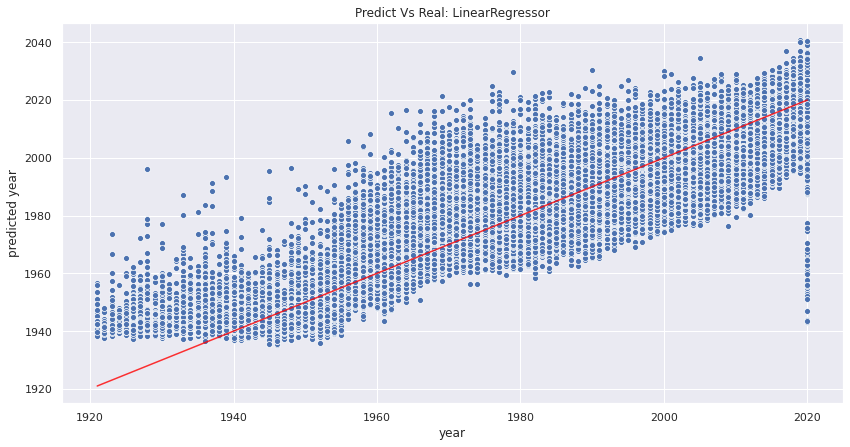

In [0]:
import seaborn as sns
sns.set()

np.array(y_test)

df_results_linear_regr = pd.DataFrame(np.array(y_test), columns=['year'])
df_results_linear_regr['predicted year']= y_pred_linear_regr

plt.figure(figsize=(14, 7))
sns.scatterplot(x='year', y='predicted year', data=df_results_linear_regr)
plt.plot([1921, 2020], [1921, 2020], c='red', linewidth=1.5, alpha=0.8)
plt.title('Predict Vs Real: LinearRegressor') 

plt.show()

**Grafico residuali linear regression**

In [0]:
df_results_linear_regr['residual']=df_results_linear_regr['year']-df_results_linear_regr['predicted year']

In [0]:
scaler = StandardScaler()
y = df_results_linear_regr[['predicted year']].values
scaler.fit(y)
y_stand_linear_regr = scaler.transform(y)
df_results_linear_regr['predicted_stand']= y_stand_linear_regr
 
#stand residuals

resid_linear_regr = df_results_linear_regr[['residual']].values
scaler.fit(resid_linear_regr)
resid_stand_linear_regr = scaler.transform(resid_linear_regr)
df_results_linear_regr['residual_stand_linear_regr'] = resid_stand_linear_regr
 
df_results_linear_regr.head(2)

,year,predicted year,residual,predicted_stand,residual_stand_linear_regr
0,2019.0,2015.654336,3.345664,1.695324,0.294218
1,1979.0,1961.568905,17.431095,-0.700276,1.550159


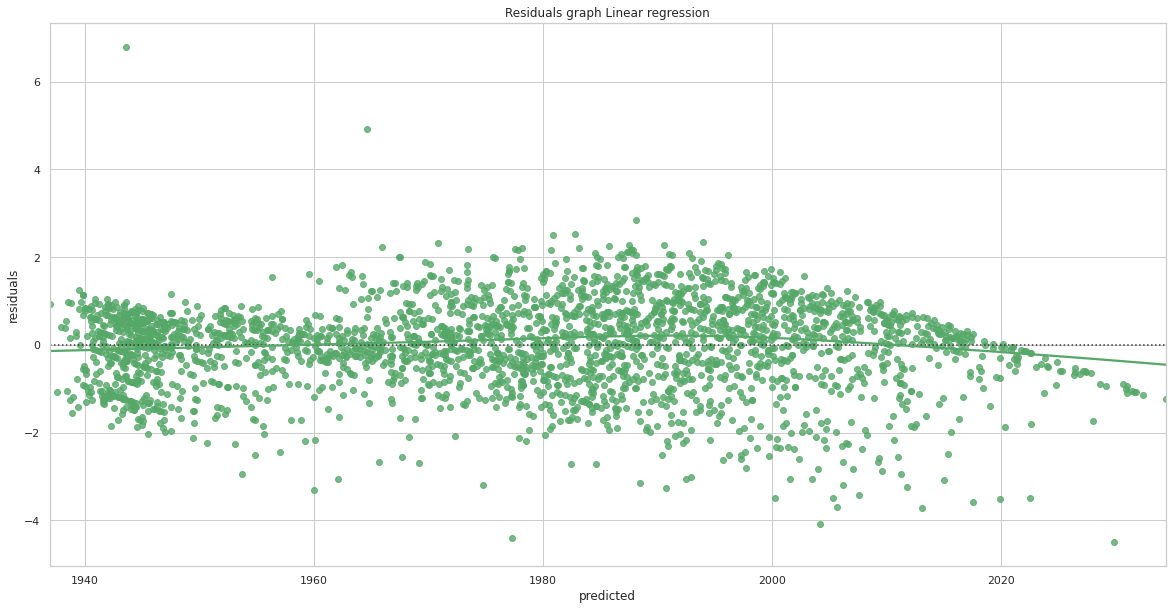

In [0]:
sns.set(style="whitegrid")
 
sample_linear_regr = df_results_linear_regr.sample(frac=0.08)
 
# Plot the residuals after fitting a linear model
plt.figure(figsize=(20, 10))
ax = sns.residplot(x='predicted year', y='residual_stand_linear_regr', data=sample_linear_regr, lowess=True, color="g")
ax.set(xlabel='predicted', ylabel='residuals')
plt.title('Residuals graph Linear regression')
plt.show()

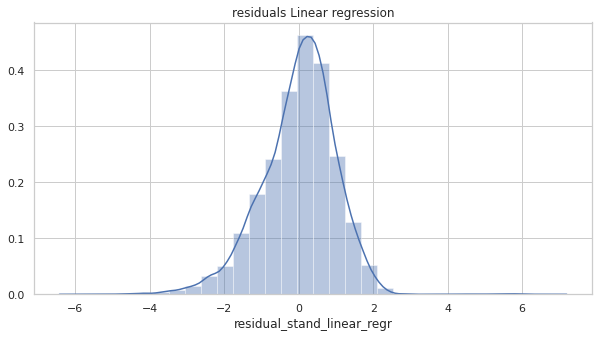

In [0]:
plt.figure(figsize=(10, 5))
sns.distplot(df_results_linear_regr['residual_stand_linear_regr'], bins =30)
plt.title('residuals Linear regression')
plt.show()

## RandomForest

In [0]:
rf = RandomForestRegressor(n_estimators=100, max_depth=200)  


rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=200, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# Make predictions using the testing set
y_pred_rf = rf.predict(X_test)


# The mean squared error
print("Mean Squared Error: %.4f" % mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: %.4f" % mean_squared_error(y_test, y_pred_rf, squared=False))

Mean Squared Error: 89.5007
Root Mean Squared Error: 9.4605


**Grafico randomforest**

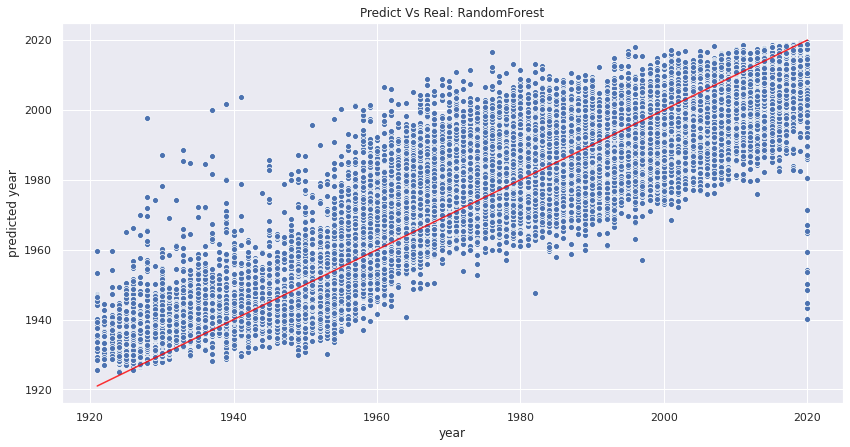

In [0]:
import seaborn as sns
sns.set()

np.array(y_test)

df_results_rf = pd.DataFrame(np.array(y_test), columns=['year'])
df_results_rf['predicted year']= y_pred_rf

plt.figure(figsize=(14, 7))
sns.scatterplot(x='year', y='predicted year', data=df_results_rf)
plt.plot([1921, 2020], [1921, 2020], c='red', linewidth=1.5, alpha=0.8)
plt.title('Predict Vs Real: RandomForest') 
plt.show()

**Grafico residuali random forest**

In [0]:
df_results_rf['residual']=df_results_rf['year']-df_results_rf['predicted year']

In [0]:
scaler = StandardScaler()
y = df_results_rf[['predicted year']].values
scaler.fit(y)
y_stand_rf = scaler.transform(y)
df_results_rf['predicted_stand']= y_stand_rf
 
#stand residuals

resid_rf = df_results_rf[['residual']].values
scaler.fit(resid_rf)
resid_stand_rf = scaler.transform(resid_rf)
df_results_rf['residual_stand_rf'] = resid_stand_rf
 
df_results_rf.head(2)

,year,predicted year,residual,predicted_stand,residual_stand_rf
0,2019.0,2017.26,1.74,1.716033,0.158088
1,1979.0,1966.65,12.35,-0.450850,1.279972


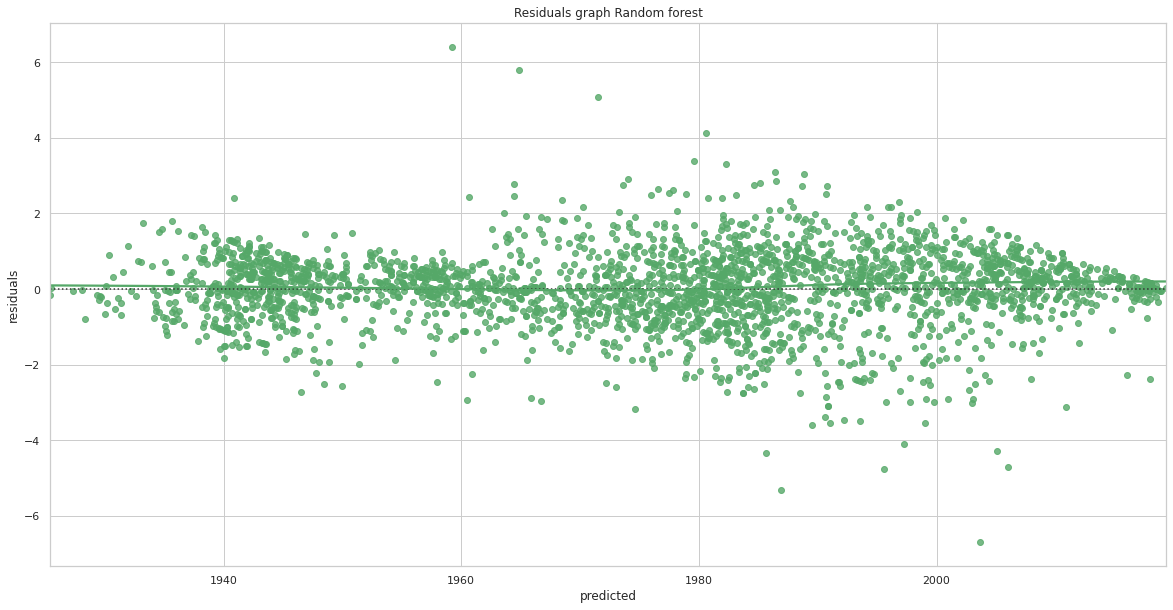

In [0]:
sns.set(style="whitegrid")
 
sample_rf = df_results_rf.sample(frac=0.08)
 

# Plot the residuals after fitting a linear model
plt.figure(figsize=(20, 10))
ax = sns.residplot(x='predicted year', y='residual_stand_rf', data=sample_rf, lowess=True, color="g")
ax.set(xlabel='predicted', ylabel='residuals')
plt.title('Residuals graph Random forest')
plt.show()

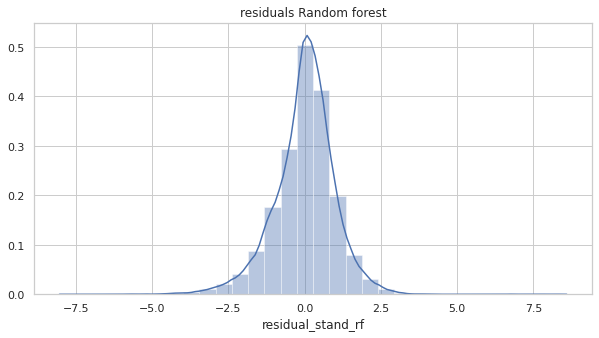

In [0]:
plt.figure(figsize=(10, 5))
sns.distplot(df_results_rf['residual_stand_rf'], bins =30)
plt.title('residuals Random forest')
plt.show()

###  Dividiamo il training set in dati di training (90%) e dati di validazione (10%)

In [23]:
tes = 0.1 
X_train_partition, X_val, y_train_partition, y_val = train_test_split(X_train_norm, y_train, 
                                                                      test_size=tes, random_state=42)

In [24]:
print('TRAIN: {} record\nVALIDATION: {} record'.format(X_train_partition.shape[0], X_val.shape[0]))

TRAIN: 120900 record
VALIDATION: 13434 record


## Training della Rete Neurale

In [25]:
from keras import models, layers, optimizers, losses, metrics
import tensorflow as tf

Using TensorFlow backend.


In [26]:
def plot_train_results(history, model_parameters, fit_parameters):

    history_dict = history.history
    x = list(range(1, len(history_dict['loss'])+1))

    loss = np.round(history_dict['loss'][-1],3)
    rmse = np.round(history_dict['rmse'][-1],3)
    mae = np.round(history_dict['mae'][-1],3)

    plt.figure(figsize=(20,5))

    plt.subplot(131)
    plt.plot(x, history_dict['loss'], label='train')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('MSE: {:.3f}'.format(loss))
    plt.legend()
    plt.grid(ls='--', alpha=0.8)

    plt.subplot(132)
    plt.plot(x, history_dict['rmse'], label='train')

    plt.xlabel('Epochs')
    plt.ylabel('rmse')
    plt.title('RMSE: {:.3f}'.format(rmse))
    plt.legend()
    plt.grid(ls='--', alpha=0.8)

    plt.subplot(133)
    plt.plot(x, history_dict['mae'], label='train')

    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.title('MAE: {:.3f}'.format(mae))
    
    plt.legend()
    plt.grid(ls='--', alpha=0.8)

   

    plt.suptitle('# neurons : {} 1thLayer  {} 2ndLayer {} 3rdLayer {} 4thLayer {} 5thLayer {} 6thLayer {} 7thLayer lr: {} batch_size: {}' 
        .format(model_parameters['first_layer_neurons_number'], 
                model_parameters['second_layer_neurons_number'], 
                model_parameters['third_layer_neurons_number'],
                model_parameters['fourth_layer_neurons_number'],
                model_parameters['fifth_layer_neurons_number'],
                model_parameters['sixth_layer_neurons_number'],
                model_parameters['seventh_layer_neurons_number'],
                model_parameters['lr'],
                fit_parameters['batch_size']))

    plt.show()

In [27]:
# funzione per calcolare rmse custom 
import keras.backend as K

def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true)))


def build_model(first_layer_neurons_number, second_layer_neurons_number, 
                third_layer_neurons_number,
                fourth_layer_neurons_number,fifth_layer_neurons_number, 
                sixth_layer_neurons_number, 
                seventh_layer_neurons_number, lr, features_number, 
                rmse=rmse,
                activation='relu'):
  
    model = models.Sequential()
    model.add(layers.Dense(first_layer_neurons_number, activation=activation, 
                        input_shape= (features_number,)))

    if second_layer_neurons_number:
        model.add(layers.Dense(second_layer_neurons_number, activation=activation))

    if third_layer_neurons_number:
        model.add(layers.Dense(third_layer_neurons_number, activation=activation))

    if fourth_layer_neurons_number:
        model.add(layers.Dense(fourth_layer_neurons_number, activation=activation))

    if fifth_layer_neurons_number:
        model.add(layers.Dense(fifth_layer_neurons_number, activation=activation))

    if sixth_layer_neurons_number:
        model.add(layers.Dense(sixth_layer_neurons_number, activation=activation))

    if seventh_layer_neurons_number:
        model.add(layers.Dense(seventh_layer_neurons_number, activation=activation))

    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.RMSprop(learning_rate=lr), loss= 'mse', 

                metrics=[rmse, 'mae']) 
  
  return model

def fit_model(model, fit_parameters, data):
    history = model.fit(**fit_parameters, **data)
    return history

def result_fit(model_parameters, fit_parameters, data):

    model = build_model(**model_parameters)
    history = fit_model(model, fit_parameters, data)
    return history

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


### Obiettivo : lavorare sul training set per diminuire l'errore della rete

Confroto tra funzioni di attivazione: tanh e relu

In [28]:
model_parameters = {
    'first_layer_neurons_number': 14, 
    'second_layer_neurons_number': 7, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'tanh'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

Epoch 1/1000
120900/120900 [==============================] - 3s 26us/step - loss: 3903023.7434 - rmse: 1975.6050 - mae: 1975.4475
Epoch 2/1000
120900/120900 [==============================] - 1s 5us/step - loss: 3887415.8815 - rmse: 1971.6532 - mae: 1971.4899
Epoch 3/1000
120900/120900 [==============================] - 1s 4us/step - loss: 3879072.1450 - rmse: 1969.5348 - mae: 1969.3721
Epoch 4/1000
120900/120900 [==============================] - 1s 4us/step - loss: 3871442.2035 - rmse: 1967.5939 - mae: 1967.4344
Epoch 5/1000
120900/120900 [==============================] - 1s 5us/step - loss: 3863828.4826 - rmse: 1965.6608 - mae: 1965.4989
Epoch 6/1000
120900/120900 [==============================] - 1s 6us/step - loss: 3856222.0881 - rmse: 1963.7242 - mae: 1963.5625
Epoch 7/1000
120900/120900 [==============================] - 1s 6us/step - loss: 3848623.1907 - rmse: 1961.7905 - mae: 1961.6271: 0s - loss: 3848919.9911 - rmse: 1961.8661 - mae: 1961.
Epoch 8/1000
120900/120900 [=====

Epoch 124/1000
120900/120900 [==============================] - 0s 4us/step - loss: 3011336.4578 - rmse: 1735.3199 - mae: 1735.1353
Epoch 125/1000
120900/120900 [==============================] - 0s 4us/step - loss: 3004622.8031 - rmse: 1733.3837 - mae: 1733.1995
Epoch 126/1000
120900/120900 [==============================] - 1s 5us/step - loss: 2997915.9870 - rmse: 1731.4467 - mae: 1731.2635
Epoch 127/1000
120900/120900 [==============================] - 1s 5us/step - loss: 2991217.2109 - rmse: 1729.5132 - mae: 1729.3285
Epoch 128/1000
120900/120900 [==============================] - 1s 5us/step - loss: 2984526.1005 - rmse: 1727.5767 - mae: 1727.3914
Epoch 129/1000
120900/120900 [==============================] - 1s 6us/step - loss: 2977842.4247 - rmse: 1725.6425 - mae: 1725.4557
Epoch 130/1000
120900/120900 [==============================] - 1s 5us/step - loss: 2971166.2335 - rmse: 1723.7057 - mae: 1723.5200
Epoch 131/1000
120900/120900 [==============================] - 0s 4us/step 

120900/120900 [==============================] - 0s 4us/step - loss: 2609378.1983 - rmse: 1615.3567 - mae: 1615.1578
Epoch 187/1000
120900/120900 [==============================] - 0s 4us/step - loss: 2603131.4167 - rmse: 1613.4210 - mae: 1613.2224
Epoch 188/1000
120900/120900 [==============================] - 0s 4us/step - loss: 2596891.6305 - rmse: 1611.4867 - mae: 1611.2875
Epoch 189/1000
120900/120900 [==============================] - 0s 4us/step - loss: 2590659.6650 - rmse: 1609.5531 - mae: 1609.3523
Epoch 190/1000
120900/120900 [==============================] - 0s 4us/step - loss: 2584434.9789 - rmse: 1607.6161 - mae: 1607.4181
Epoch 191/1000
120900/120900 [==============================] - 0s 4us/step - loss: 2578217.5662 - rmse: 1605.6810 - mae: 1605.4827
Epoch 192/1000
120900/120900 [==============================] - 0s 4us/step - loss: 2572007.9167 - rmse: 1603.7458 - mae: 1603.5469
Epoch 193/1000
120900/120900 [==============================] - 0s 4us/step - loss: 2565805

120900/120900 [==============================] - 0s 4us/step - loss: 1902519.3130 - rmse: 1379.3165 - mae: 1379.0850
Epoch 309/1000
120900/120900 [==============================] - 0s 4us/step - loss: 1897186.2600 - rmse: 1377.3831 - mae: 1377.1503
Epoch 310/1000
120900/120900 [==============================] - 0s 4us/step - loss: 1891860.6024 - rmse: 1375.4479 - mae: 1375.2150
Epoch 311/1000
120900/120900 [==============================] - 0s 4us/step - loss: 1886542.3217 - rmse: 1373.5146 - mae: 1373.2806
Epoch 312/1000
120900/120900 [==============================] - 1s 4us/step - loss: 1881231.5847 - rmse: 1371.5790 - mae: 1371.3455
Epoch 313/1000
120900/120900 [==============================] - 0s 4us/step - loss: 1875928.5456 - rmse: 1369.6450 - mae: 1369.4106
Epoch 314/1000
120900/120900 [==============================] - 1s 5us/step - loss: 1870632.8106 - rmse: 1367.7100 - mae: 1367.4761
Epoch 315/1000
120900/120900 [==============================] - 0s 4us/step - loss: 1865344

120900/120900 [==============================] - 1s 6us/step - loss: 1316006.3973 - rmse: 1147.1711 - mae: 1146.8925
Epoch 429/1000
120900/120900 [==============================] - 1s 6us/step - loss: 1311571.8639 - rmse: 1145.2372 - mae: 1144.9578
Epoch 430/1000
120900/120900 [==============================] - 1s 6us/step - loss: 1307144.7977 - rmse: 1143.3032 - mae: 1143.0222: 0s - loss: 1308500.9881 - rmse: 
Epoch 431/1000
120900/120900 [==============================] - 1s 6us/step - loss: 1302725.1138 - rmse: 1141.3693 - mae: 1141.0879
Epoch 432/1000
120900/120900 [==============================] - 1s 6us/step - loss: 1298312.9853 - rmse: 1139.4330 - mae: 1139.1525
Epoch 433/1000
120900/120900 [==============================] - 1s 6us/step - loss: 1293908.3206 - rmse: 1137.4979 - mae: 1137.2181
Epoch 434/1000
120900/120900 [==============================] - 1s 5us/step - loss: 1289511.3746 - rmse: 1135.5638 - mae: 1135.2827
Epoch 435/1000
120900/120900 [===========================

120900/120900 [==============================] - 1s 4us/step - loss: 826538.3928 - rmse: 909.1405 - mae: 908.7874
Epoch 552/1000
120900/120900 [==============================] - 0s 4us/step - loss: 823017.4349 - rmse: 907.2010 - mae: 906.8486
Epoch 553/1000
120900/120900 [==============================] - 0s 4us/step - loss: 819502.6097 - rmse: 905.2620 - mae: 904.9082
Epoch 554/1000
120900/120900 [==============================] - 0s 4us/step - loss: 815994.9952 - rmse: 903.3235 - mae: 902.9680A: 0s - loss: 817547.0913 - rmse: 904.1825 - mae: 9
Epoch 555/1000
120900/120900 [==============================] - 0s 4us/step - loss: 812495.4565 - rmse: 901.3839 - mae: 901.0278
Epoch 556/1000
120900/120900 [==============================] - 0s 4us/step - loss: 809003.5537 - rmse: 899.4449 - mae: 899.0884
Epoch 557/1000
120900/120900 [==============================] - 1s 4us/step - loss: 805519.5835 - rmse: 897.5045 - mae: 897.1490
Epoch 558/1000
120900/120900 [==============================]

120900/120900 [==============================] - 1s 6us/step - loss: 622452.6123 - rmse: 788.9528 - mae: 788.5486
Epoch 614/1000
120900/120900 [==============================] - 1s 5us/step - loss: 619399.3831 - rmse: 787.0162 - mae: 786.6104
Epoch 615/1000
120900/120900 [==============================] - 1s 7us/step - loss: 616352.1203 - rmse: 785.0791 - mae: 784.6708
Epoch 616/1000
120900/120900 [==============================] - 1s 5us/step - loss: 613312.9248 - rmse: 783.1409 - mae: 782.7319
Epoch 617/1000
120900/120900 [==============================] - 1s 5us/step - loss: 610282.9000 - rmse: 781.2047 - mae: 780.7939
Epoch 618/1000
120900/120900 [==============================] - 1s 4us/step - loss: 607258.9040 - rmse: 779.2679 - mae: 778.8550
Epoch 619/1000
120900/120900 [==============================] - 1s 4us/step - loss: 604242.6204 - rmse: 777.3299 - mae: 776.9163
Epoch 620/1000
120900/120900 [==============================] - 1s 5us/step - loss: 601232.6176 - rmse: 775.3895

120900/120900 [==============================] - 0s 4us/step - loss: 449939.7479 - rmse: 670.7737 - mae: 670.2953
Epoch 675/1000
120900/120900 [==============================] - 0s 4us/step - loss: 447343.9281 - rmse: 668.8350 - mae: 668.3562
Epoch 676/1000
120900/120900 [==============================] - 0s 4us/step - loss: 444755.5836 - rmse: 666.8976 - mae: 666.4172
Epoch 677/1000
120900/120900 [==============================] - 0s 4us/step - loss: 442175.4298 - rmse: 664.9601 - mae: 664.4788
Epoch 678/1000
120900/120900 [==============================] - 1s 5us/step - loss: 439603.1705 - rmse: 663.0244 - mae: 662.5403
Epoch 679/1000
120900/120900 [==============================] - 0s 4us/step - loss: 437040.1124 - rmse: 661.0878 - mae: 660.6029
Epoch 680/1000
120900/120900 [==============================] - 0s 4us/step - loss: 434483.2170 - rmse: 659.1516 - mae: 658.6652
Epoch 681/1000
120900/120900 [==============================] - 1s 5us/step - loss: 431934.2018 - rmse: 657.2145

120900/120900 [==============================] - 1s 5us/step - loss: 187238.9580 - rmse: 432.7094 - mae: 431.9669
Epoch 798/1000
120900/120900 [==============================] - 0s 4us/step - loss: 185568.9020 - rmse: 430.7735 - mae: 430.0291
Epoch 799/1000
120900/120900 [==============================] - 1s 4us/step - loss: 183906.6321 - rmse: 428.8421 - mae: 428.0925A: 0s - loss: 184506.7349 - rmse: 429.5411 - mae: 
Epoch 800/1000
120900/120900 [==============================] - 1s 4us/step - loss: 182252.3650 - rmse: 426.9099 - mae: 426.1556
Epoch 801/1000
120900/120900 [==============================] - 1s 5us/step - loss: 180605.1083 - rmse: 424.9732 - mae: 424.2188
Epoch 802/1000
120900/120900 [==============================] - 0s 4us/step - loss: 178965.2632 - rmse: 423.0395 - mae: 422.2811
Epoch 803/1000
120900/120900 [==============================] - 0s 4us/step - loss: 177332.9018 - rmse: 421.1064 - mae: 420.3442
Epoch 804/1000
120900/120900 [==============================] 

120900/120900 [==============================] - 1s 4us/step - loss: 35994.8600 - rmse: 189.7191 - mae: 188.0189
Epoch 924/1000
120900/120900 [==============================] - 0s 4us/step - loss: 35271.0044 - rmse: 187.8005 - mae: 186.0840
Epoch 925/1000
120900/120900 [==============================] - 0s 4us/step - loss: 34554.3951 - rmse: 185.8833 - mae: 184.1482
Epoch 926/1000
120900/120900 [==============================] - 0s 4us/step - loss: 33845.3939 - rmse: 183.9668 - mae: 182.2133
Epoch 927/1000
120900/120900 [==============================] - 0s 4us/step - loss: 33143.7607 - rmse: 182.0495 - mae: 180.2778
Epoch 928/1000
120900/120900 [==============================] - 1s 5us/step - loss: 32449.7892 - rmse: 180.1330 - mae: 178.3423
Epoch 929/1000
120900/120900 [==============================] - 1s 5us/step - loss: 31763.3659 - rmse: 178.2170 - mae: 176.4076
Epoch 930/1000
120900/120900 [==============================] - 1s 6us/step - loss: 31084.5310 - rmse: 176.3039 - mae: 

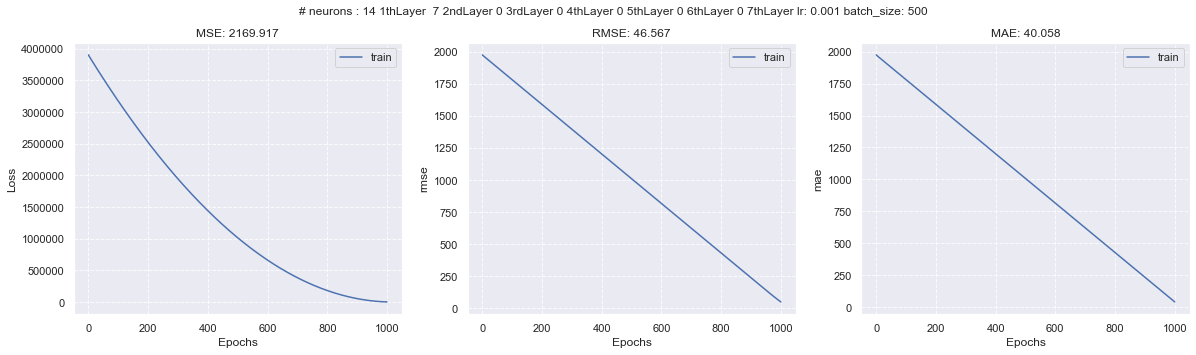

In [29]:
plot_train_results(history, model_parameters, fit_parameters)

**Si parte da una rete con scelta casuale di neuroni e layer: 14 primo layer e 7 neuroni layer sul secondo.**

In [0]:
model_parameters = {
    'first_layer_neurons_number': 14, 
    'second_layer_neurons_number': 7, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

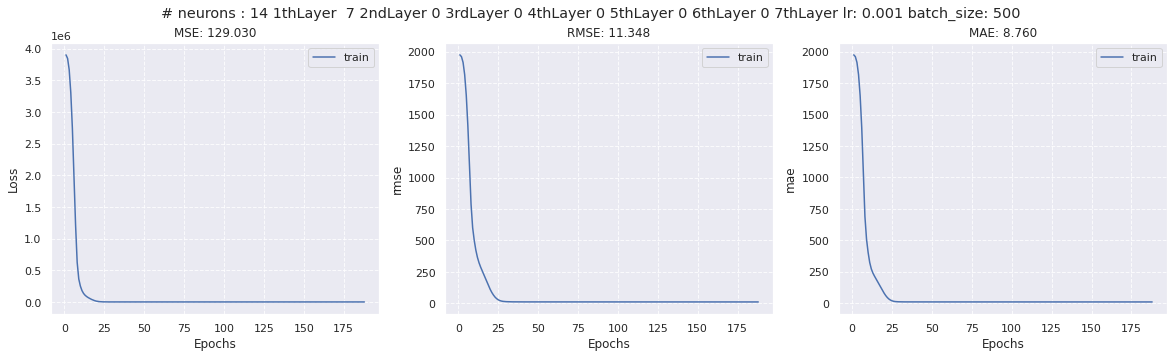

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

MSE 129  > 125 (riferimento baseline) quindi proviamo ad aumentare il numero di livelli della rete e neuroni

In [0]:
model_parameters = {
    'first_layer_neurons_number': 14, 
    'second_layer_neurons_number': 7, 
    'third_layer_neurons_number': 8, 
    'fourth_layer_neurons_number': 7,
    'fifth_layer_neurons_number': 8,
    'sixth_layer_neurons_number': 7,
    'seventh_layer_neurons_number': 8,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

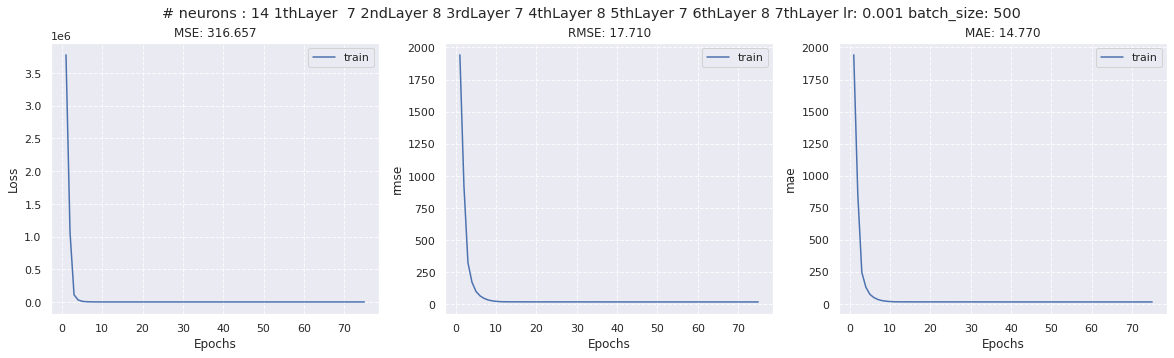

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

Manteniamo il numero di neuroni costante (59+1) ma diminuiamo i livelli

In [0]:
model_parameters = {
    'first_layer_neurons_number': 14+7, 
    'second_layer_neurons_number': 8+7, 
    'third_layer_neurons_number': 7+8, 
    'fourth_layer_neurons_number': 8,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

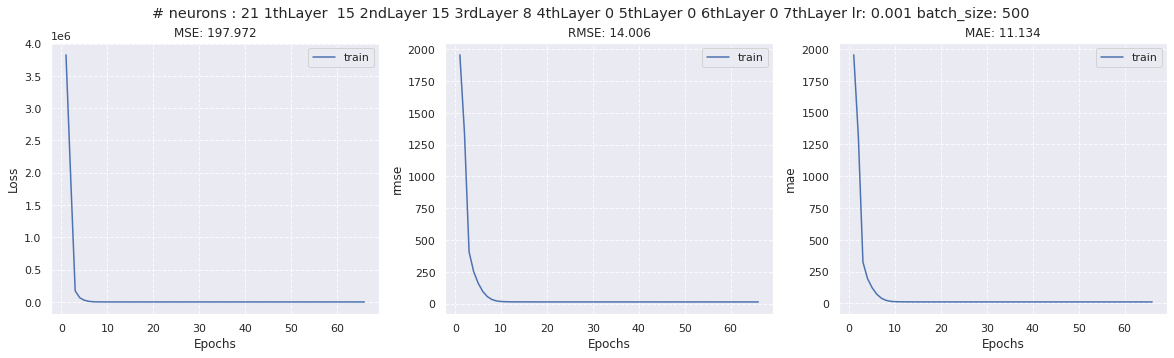

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

Notiamo che le metriche diminuscono, quindi avere troppi livelli peggiora il comportamento della rete. Continuamo a ridurre i livelli mantenendo il numero  di neuroni costante. 

In [0]:
model_parameters = {
    'first_layer_neurons_number': 40, 
    'second_layer_neurons_number': 19, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

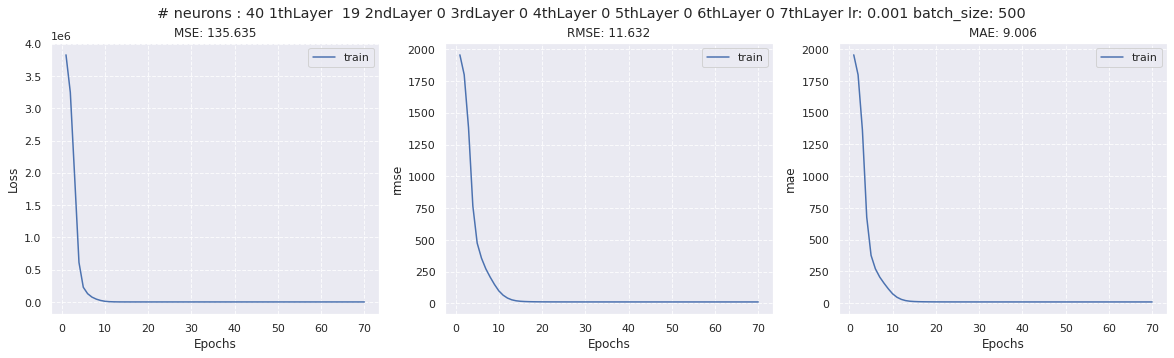

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

Arrivati ad un mae di 9 abbiamo conferma che ridurre i livelli apporta un miglioramento. Utilizzaimo ora un solo layer.

In [0]:
model_parameters = {
    'first_layer_neurons_number': 59, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

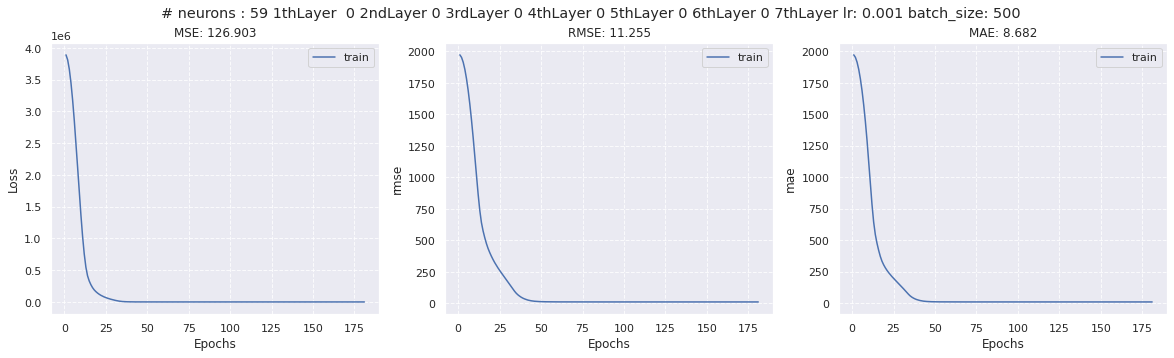

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

proviamo a ridurre il numero di neuroni del primo layer

In [0]:
model_parameters = {
    'first_layer_neurons_number': 14, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

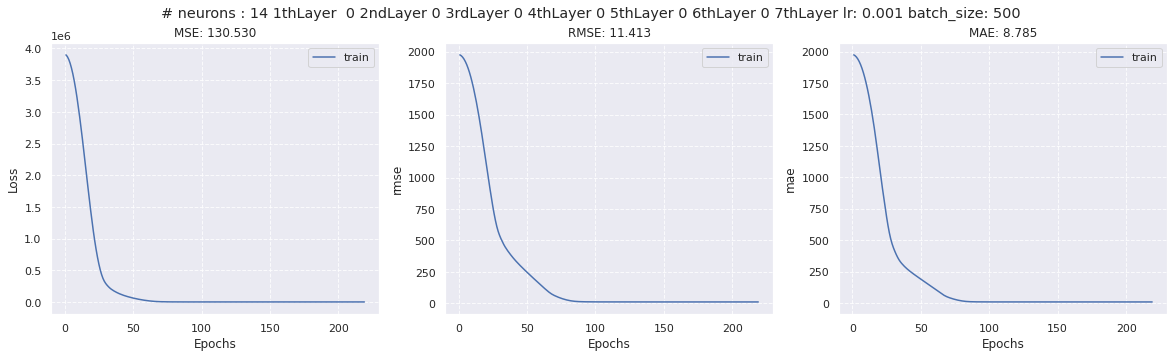

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

Proviamo la rete con 128 neuroni sul primo layer

In [0]:
model_parameters = {
    'first_layer_neurons_number': 128, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

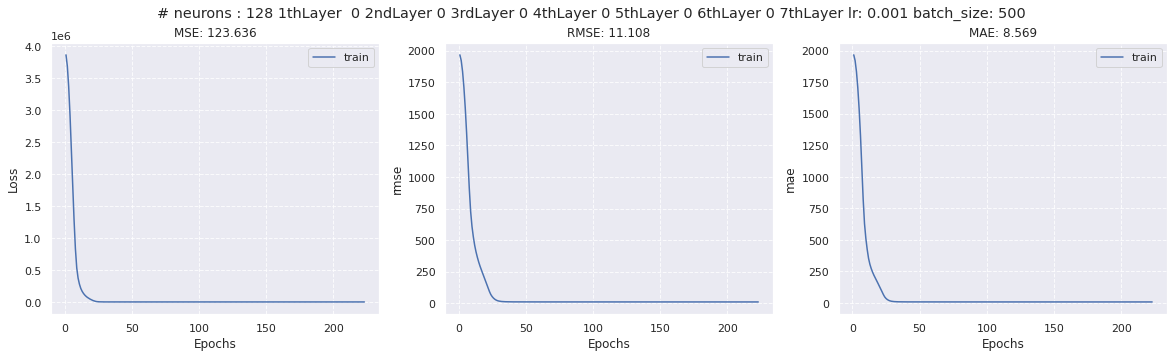

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

Riduciamo il batch size per le reti che hanno dimostrato avere un mse paragonabile con quello della baseline. 

In [0]:
model_parameters = {
    'first_layer_neurons_number': 59, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 250, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

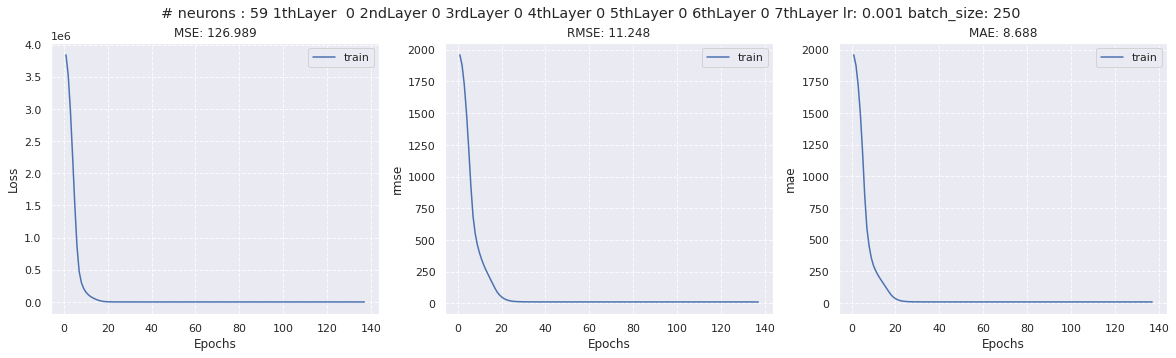

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

Stesso valore di MSE ottenuto con batch size di 500

In [0]:
model_parameters = {
    'first_layer_neurons_number': 14, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 250, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

Epoch 1/1000
120900/120900 [==============================] - 1s 10us/step - loss: 3888950.1409 - rmse: 1972.0321 - mae: 1971.8613
Epoch 2/1000
120900/120900 [==============================] - 1s 10us/step - loss: 3810904.0011 - rmse: 1952.1267 - mae: 1951.8738
Epoch 3/1000
120900/120900 [==============================] - 1s 9us/step - loss: 3668752.2031 - rmse: 1915.3297 - mae: 1914.7889
Epoch 4/1000
120900/120900 [==============================] - 1s 9us/step - loss: 3465448.5554 - rmse: 1861.4614 - mae: 1860.1031
Epoch 5/1000
120900/120900 [==============================] - 1s 9us/step - loss: 3208579.5516 - rmse: 1791.0842 - mae: 1787.9352
Epoch 6/1000
120900/120900 [==============================] - 1s 9us/step - loss: 2907160.8233 - rmse: 1704.7772 - mae: 1698.1172
Epoch 7/1000
120900/120900 [==============================] - 1s 9us/step - loss: 2573740.6091 - rmse: 1603.9166 - mae: 1590.9923
Epoch 8/1000
120900/120900 [==============================] - 1s 9us/step - loss: 222203

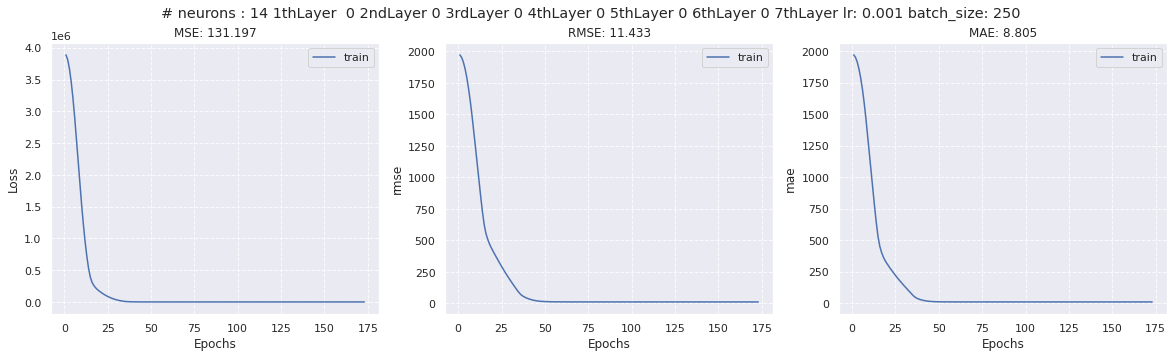

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

In [0]:
model_parameters = {
    'first_layer_neurons_number': 128, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, 
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 250, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

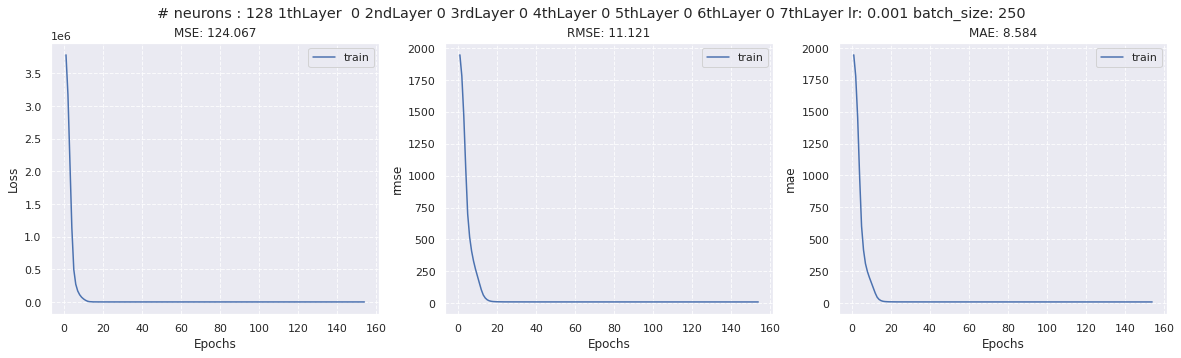

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

Con un batch size di 250 il comportamento delle reti sembra non variare tanto in fase di train. Lieve peggioramento di MSE sulla rete con 128 neuroni

**Proviamo a variare il learning rate**

Proviamo prima a diminuire il learning rate di un ordine di grandezza

In [0]:
model_parameters = {
    'first_layer_neurons_number': 59, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.0001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1000,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

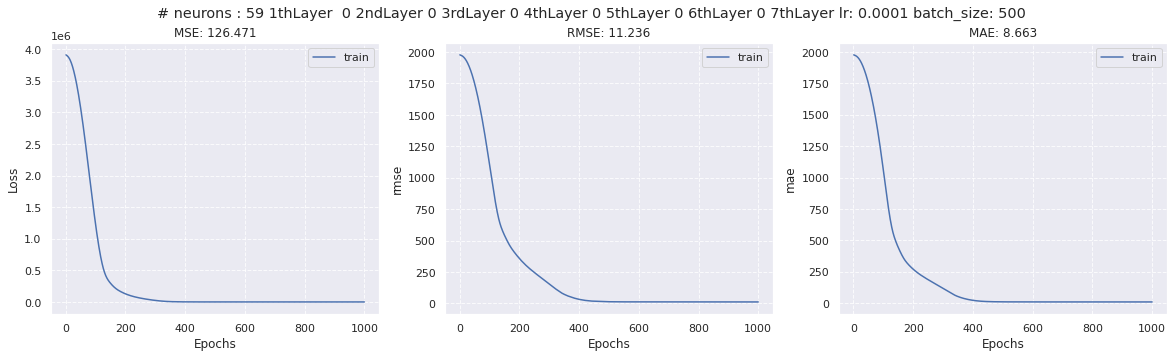

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

In [0]:
model_parameters = {
    'first_layer_neurons_number': 14, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.0001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

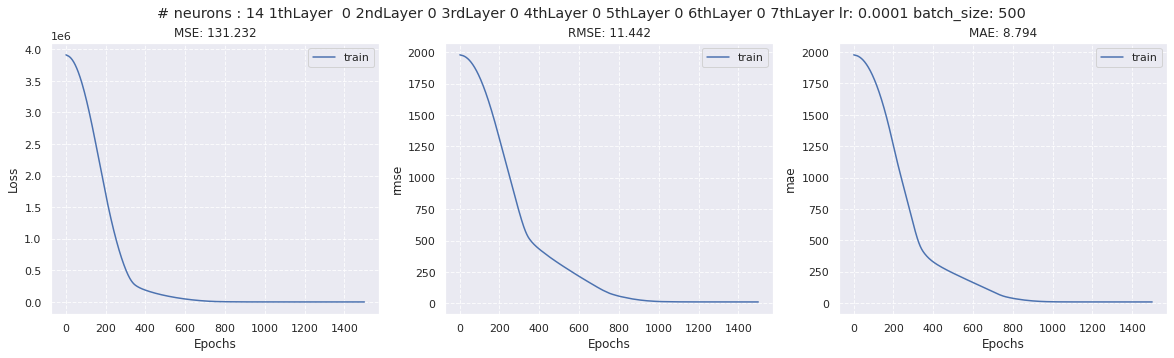

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

In [0]:
model_parameters = {
    'first_layer_neurons_number': 128, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.0001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

Epoch 1/1500
120900/120900 [==============================] - 1s 6us/step - loss: 3909960.9175 - rmse: 1977.3617 - mae: 1977.1991
Epoch 2/1500
120900/120900 [==============================] - 1s 5us/step - loss: 3904801.7024 - rmse: 1976.0563 - mae: 1975.8937
Epoch 3/1500
120900/120900 [==============================] - 1s 5us/step - loss: 3899344.7756 - rmse: 1974.6749 - mae: 1974.5115
Epoch 4/1500
120900/120900 [==============================] - 1s 5us/step - loss: 3893332.5544 - rmse: 1973.1510 - mae: 1972.9889
Epoch 5/1500
120900/120900 [==============================] - 1s 5us/step - loss: 3886559.1904 - rmse: 1971.4326 - mae: 1971.2712
Epoch 6/1500
120900/120900 [==============================] - 1s 5us/step - loss: 3878814.4020 - rmse: 1969.4695 - mae: 1969.3062
Epoch 7/1500
120900/120900 [==============================] - 1s 5us/step - loss: 3869888.1359 - rmse: 1967.2012 - mae: 1967.0374
Epoch 8/1500
120900/120900 [==============================] - 1s 5us/step - loss: 3859629.

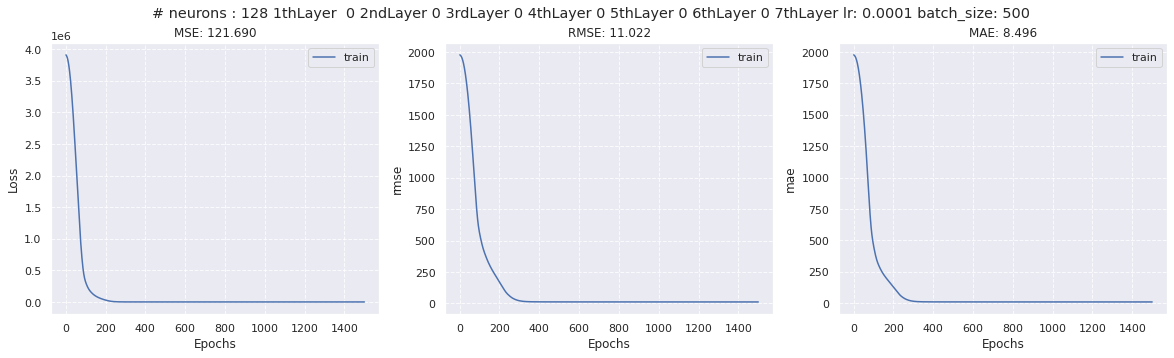

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

Aumento il learnig rate solo sulla migliore delle 3 precedenti 128 (neuroni)

In [0]:
model_parameters = {
    'first_layer_neurons_number': 128, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.01, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    #'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

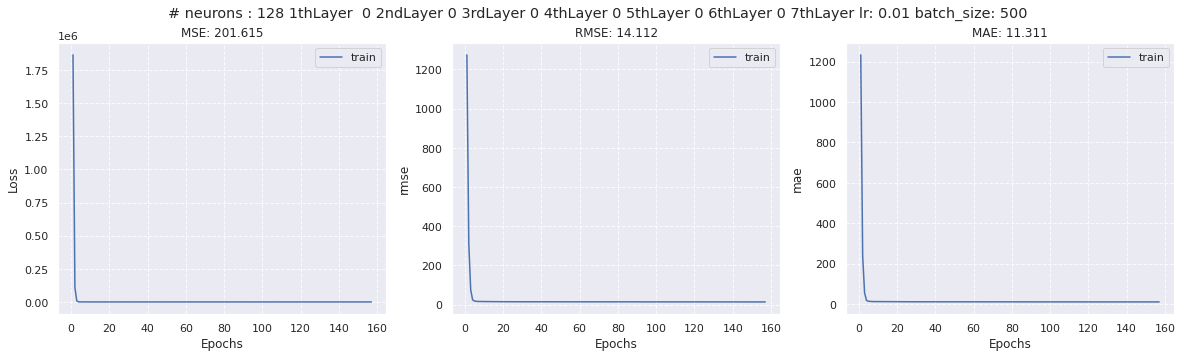

In [0]:
plot_train_results(history, model_parameters, fit_parameters)

Definiamo la funzione per costruire modelli con optimizer Adam

## Validation Test

Vogliamo adesso analizzare il comportamento della nostra rete migliore sul validation set per vedere se sono necessarie ulteriori modifiche della rete e dei parametri.

In [0]:
def plot_validation_results(history, model_parameters, fit_parameters):

    history_dict = history.history
    x = list(range(1, len(history_dict['loss'])+1))


    plt.figure(figsize=(20,10))

    plt.subplot(231)
    plt.plot(x, history_dict['loss'], label='train')
    plt.plot(x, history_dict['val_loss'], label='val')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('MSE')
    plt.legend()
    plt.grid(ls='--', alpha=0.8)

    plt.subplot(234)
    plt.plot(x, history_dict['loss'], label='train')
    plt.plot(x, history_dict['val_loss'], label='val')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('MSE ZOOM')
   
    plt.ylim(100,150)
    plt.legend()
    plt.grid(ls='--', alpha=0.8)

    plt.subplot(232)
    plt.plot(x, history_dict['rmse'], label='train')
    plt.plot(x, history_dict['val_rmse'], label='val')

    plt.xlabel('Epochs')
    plt.ylabel('rmse')
    plt.title('RMSE')
    plt.legend()
    plt.grid(ls='--', alpha=0.8)

    plt.subplot(235)
    plt.plot(x, history_dict['rmse'], label='train')
    plt.plot(x, history_dict['val_rmse'], label='val')
    plt.xlabel('Epochs')
    plt.ylabel('rmse')
    plt.title('RMSE ZOOM')
    plt.ylim(9,14)
    plt.legend()
    plt.grid(ls='--', alpha=0.8)


    plt.subplot(233)
    plt.plot(x, history_dict['mae'], label='train')
    plt.plot(x, history_dict['val_mae'], label='val')

    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.title('MAE')
    plt.legend()
    plt.grid(ls='--', alpha=0.8)

    plt.subplot(236)
    plt.plot(x, history_dict['mae'], label='train')
    plt.plot(x, history_dict['val_mae'], label='val')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.title('MAE ZOOM')
    plt.ylim(7,10)
    plt.legend()
    plt.grid(ls='--', alpha=0.8)



    plt.suptitle('# neurons : {} 1thLayer  {} 2ndLayer {} 3rdLayer {} 4thLayer {} 5thLayer {} 6thLayer {} 7thLayer lr: {} batch_size: {}' 
      .format(model_parameters['first_layer_neurons_number'], 
              model_parameters['second_layer_neurons_number'], 
              model_parameters['third_layer_neurons_number'],
              model_parameters['fourth_layer_neurons_number'],
              model_parameters['fifth_layer_neurons_number'],
              model_parameters['sixth_layer_neurons_number'],
              model_parameters['seventh_layer_neurons_number'],
              model_parameters['lr'],
              fit_parameters['batch_size']))


    plt.show()

In [0]:
 model_parameters = {
    'first_layer_neurons_number': 128, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 500, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition,
    'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

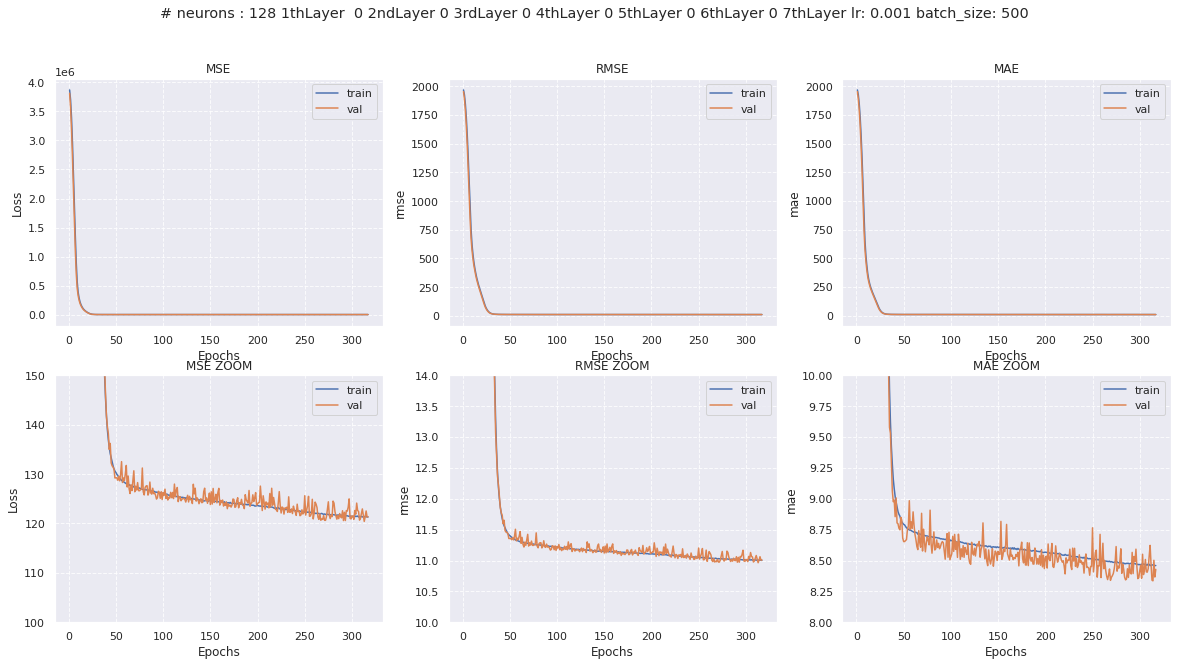

In [0]:
plot_validation_results(history, model_parameters, fit_parameters)

MSE anche sul validation è su 121 (< 125 del baseline). Il MAE del validation è inferiore a quello del training set. Proviamo a diminuire le dimensioni del batch per vedere se il modello riesce ad apprendere meglio.

In [0]:
 model_parameters = {
    'first_layer_neurons_number': 128, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 250, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition,
    'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

Train on 120900 samples, validate on 13434 samples
Epoch 1/1500
120900/120900 [==============================] - 1s 11us/step - loss: 3795353.1075 - rmse: 1947.9686 - mae: 1947.7898 - val_loss: 3591178.4154 - val_rmse: 1895.0537 - val_mae: 1894.6084
Epoch 2/1500
120900/120900 [==============================] - 1s 10us/step - loss: 3216320.9849 - rmse: 1792.0488 - mae: 1790.3466 - val_loss: 2776358.2800 - val_rmse: 1666.2517 - val_mae: 1661.7825
Epoch 3/1500
120900/120900 [==============================] - 1s 10us/step - loss: 2245476.4826 - rmse: 1494.6550 - mae: 1481.5562 - val_loss: 1706193.2994 - val_rmse: 1306.1798 - val_mae: 1279.3544
Epoch 4/1500
120900/120900 [==============================] - 1s 10us/step - loss: 1206990.2046 - rmse: 1091.2401 - mae: 1038.3895 - val_loss: 771315.0651 - val_rmse: 878.0685 - val_mae: 802.5333
Epoch 5/1500
120900/120900 [==============================] - 1s 10us/step - loss: 501747.9901 - rmse: 701.7751 - mae: 610.6758 - val_loss: 320068.5873 - va

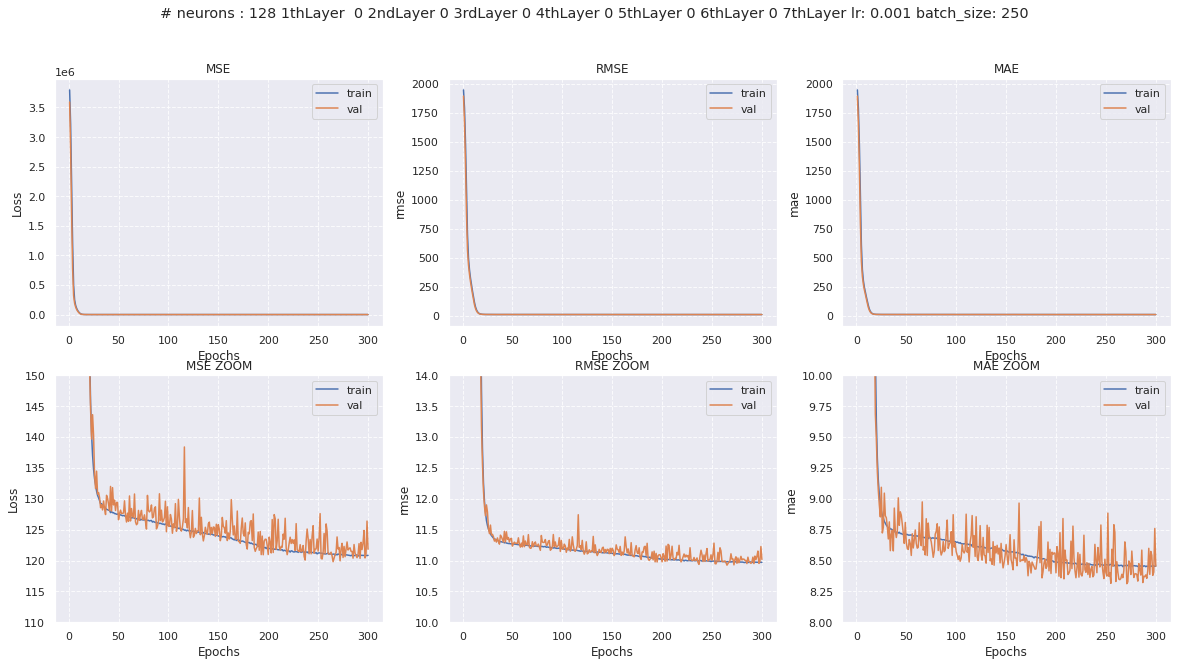

In [0]:
plot_validation_results(history, model_parameters, fit_parameters)

Portare il batch size a 250 campioni ha migliorato il comportamento del validation, avvicinandolo al train. Proviamo ancora a diminuire il batch size per vedere se ci sono miglioramenti.

In [0]:
 model_parameters = {
    'first_layer_neurons_number': 128, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 125, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition,
    'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)



Train on 120900 samples, validate on 13434 samples
Epoch 1/1500
120900/120900 [==============================] - 2s 20us/step - loss: 3527136.2893 - rmse: 1875.7981 - mae: 1875.0164 - val_loss: 2816102.0866 - val_rmse: 1678.1984 - val_mae: 1673.8885
Epoch 2/1500
120900/120900 [==============================] - 2s 20us/step - loss: 1770516.7443 - rmse: 1310.4244 - mae: 1277.5428 - val_loss: 813039.9136 - val_rmse: 901.4364 - val_mae: 822.1229
Epoch 3/1500
120900/120900 [==============================] - 2s 20us/step - loss: 411603.4670 - rmse: 628.8317 - mae: 532.4210 - val_loss: 219059.0060 - val_rmse: 466.7885 - val_mae: 362.6912
Epoch 4/1500
120900/120900 [==============================] - 2s 20us/step - loss: 153832.3558 - rmse: 388.6087 - mae: 291.9372 - val_loss: 104159.5402 - val_rmse: 321.2537 - val_mae: 239.1657
Epoch 5/1500
120900/120900 [==============================] - 2s 19us/step - loss: 71776.3952 - rmse: 264.4847 - mae: 198.0141 - val_loss: 44619.5329 - val_rmse: 209.24

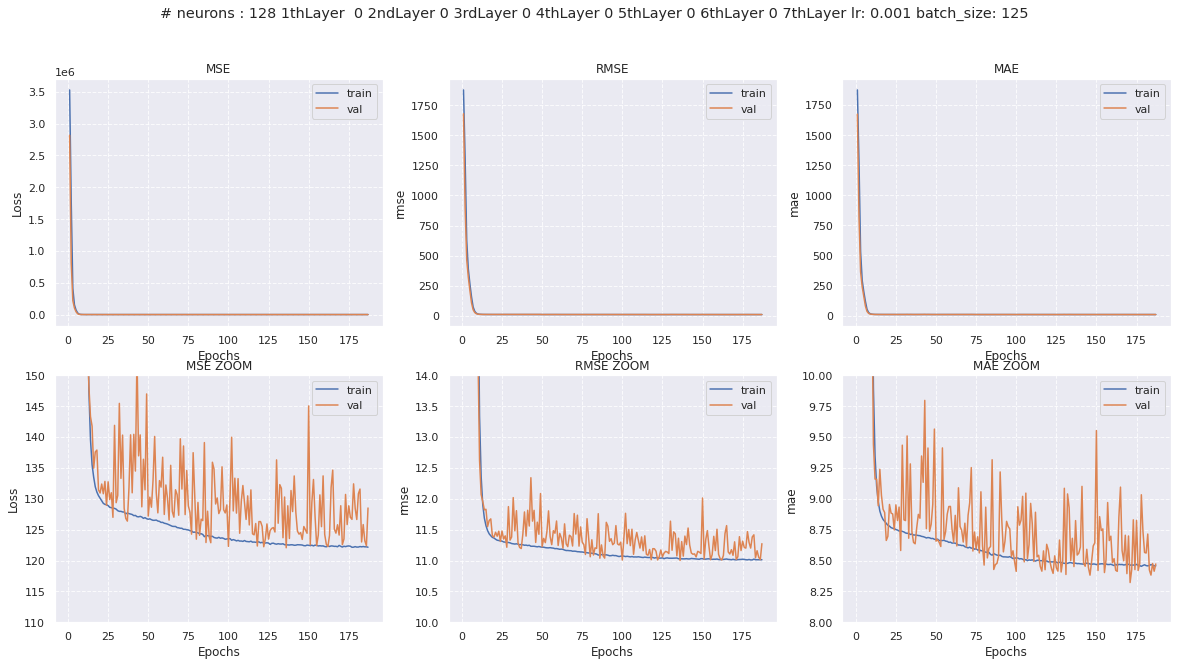

In [0]:
plot_validation_results(history, model_parameters, fit_parameters)

Al fine di diminuire la varianza nel validation set abbiamo provato a ridurre il numero di neuroni a 59 mantenendo la stessa batch size: la varianza diminuisce, ma l’errore aumenta. 

In [0]:
 model_parameters = {
    'first_layer_neurons_number': 59, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 125, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition,
    'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)


Train on 120900 samples, validate on 13434 samples
Epoch 1/1500
120900/120900 [==============================] - 2s 20us/step - loss: 3707387.6353 - rmse: 1924.8640 - mae: 1924.6680 - val_loss: 3338423.5469 - val_rmse: 1827.1904 - val_mae: 1826.3231
Epoch 2/1500
120900/120900 [==============================] - 2s 20us/step - loss: 2697031.9324 - rmse: 1637.4689 - mae: 1632.0757 - val_loss: 1983733.2663 - val_rmse: 1408.5162 - val_mae: 1392.5856
Epoch 3/1500
120900/120900 [==============================] - 2s 20us/step - loss: 1278287.5120 - rmse: 1117.0508 - mae: 1066.4177 - val_loss: 684554.8961 - val_rmse: 827.0901 - val_mae: 735.3808
Epoch 4/1500
120900/120900 [==============================] - 2s 19us/step - loss: 420301.6841 - rmse: 641.6002 - mae: 545.0486 - val_loss: 272053.2160 - val_rmse: 520.4730 - val_mae: 420.3593
Epoch 5/1500
120900/120900 [==============================] - 2s 19us/step - loss: 206051.9284 - rmse: 451.4356 - mae: 346.0948 - val_loss: 156200.2444 - val_rmse

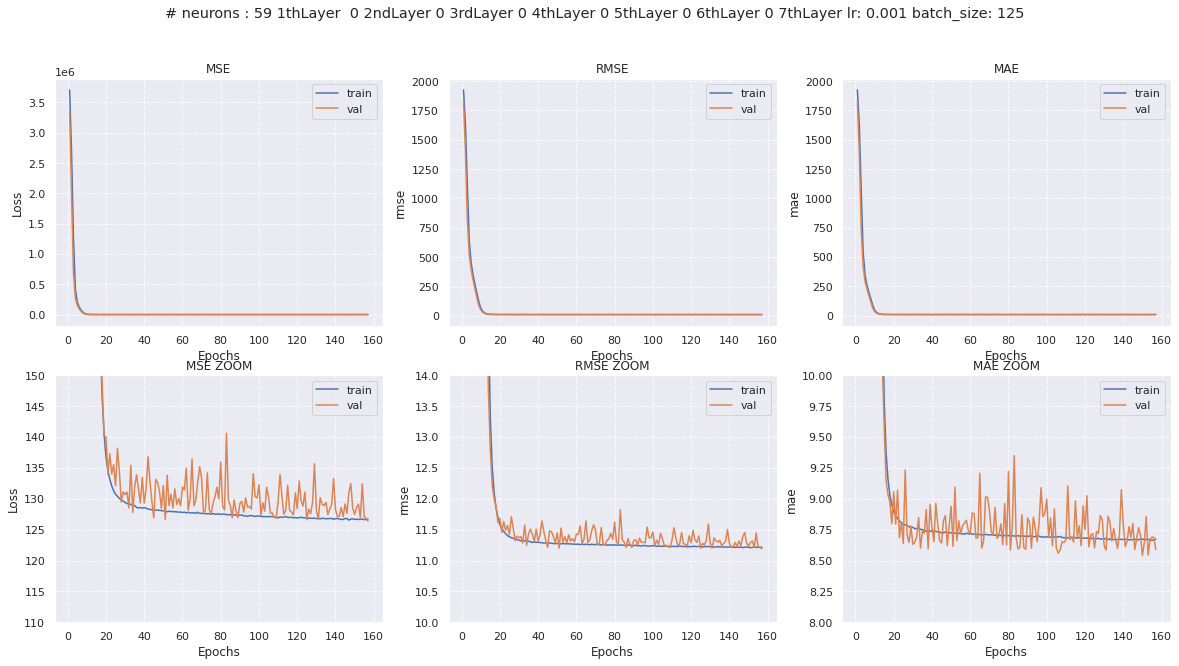

In [0]:
plot_validation_results(history, model_parameters, fit_parameters)

Validation set mostra una loss inferiore per la rete con 59+1 neuroni (anche se in training avevamo risultati un pò diversi; la rete da 128 aveva una loss più bassa in assoluto 121). Ma la rete con 59 neuroni sembra mostrare una varianza minore sul validation.

**Proviamo cambiando ottimizzatore. da rmsprop ad Adam. Dimuisco il batch size 100 e lr 0.001**

In [0]:

import keras.backend as K

def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true)))


def build_model_adam(first_layer_neurons_number, second_layer_neurons_number, 
                third_layer_neurons_number,
                fourth_layer_neurons_number,fifth_layer_neurons_number, 
                sixth_layer_neurons_number, 
                seventh_layer_neurons_number, lr, features_number, 
                rmse=rmse,
                activation='relu'):
  
    model = models.Sequential()
    model.add(layers.Dense(first_layer_neurons_number, activation=activation, 
                        input_shape= (features_number,)))

    if second_layer_neurons_number:
        model.add(layers.Dense(second_layer_neurons_number, activation=activation))

    if third_layer_neurons_number:
        model.add(layers.Dense(third_layer_neurons_number, activation=activation))

    if fourth_layer_neurons_number:
        model.add(layers.Dense(fourth_layer_neurons_number, activation=activation))

    if fifth_layer_neurons_number:
        model.add(layers.Dense(fifth_layer_neurons_number, activation=activation))

    if sixth_layer_neurons_number:
        model.add(layers.Dense(sixth_layer_neurons_number, activation=activation))

    if seventh_layer_neurons_number:
        model.add(layers.Dense(seventh_layer_neurons_number, activation=activation))

    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.adam(learning_rate=lr), loss= 'mse', metrics=[rmse, 'mae']) 
  
    return model

def fit_model(model, fit_parameters, data):
    history = model.fit(**fit_parameters, **data)
    return history

def result_fit_adam(model_parameters, fit_parameters, data):
    model = build_model_adam(**model_parameters)
    history = fit_model(model, fit_parameters, data)
    return history

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [0]:
model_parameters = {
    'first_layer_neurons_number': 128, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 100, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition,
    'validation_data': (X_val, y_val)
}

history =  result_fit_adam(model_parameters, fit_parameters, data)

Train on 120900 samples, validate on 13434 samples
Epoch 1/1500
120900/120900 [==============================] - 5s 39us/step - loss: 2779216.0323 - rmse: 1642.3533 - mae: 1631.5819 - val_loss: 1156778.6728 - val_rmse: 1075.4463 - val_mae: 1023.8482
Epoch 2/1500
120900/120900 [==============================] - 5s 37us/step - loss: 517859.9654 - rmse: 701.1012 - mae: 612.8480 - val_loss: 260787.2609 - val_rmse: 509.2768 - val_mae: 413.2450
Epoch 3/1500
120900/120900 [==============================] - 4s 37us/step - loss: 191692.4406 - rmse: 434.7543 - mae: 336.1651 - val_loss: 142627.0408 - val_rmse: 375.7672 - val_mae: 280.8259
Epoch 4/1500
120900/120900 [==============================] - 4s 37us/step - loss: 112496.1459 - rmse: 333.0745 - mae: 246.8822 - val_loss: 86625.4663 - val_rmse: 292.4599 - val_mae: 216.7155
Epoch 5/1500
120900/120900 [==============================] - 4s 36us/step - loss: 65181.5495 - rmse: 252.8251 - mae: 187.9624 - val_loss: 46090.2293 - val_rmse: 212.8889 -

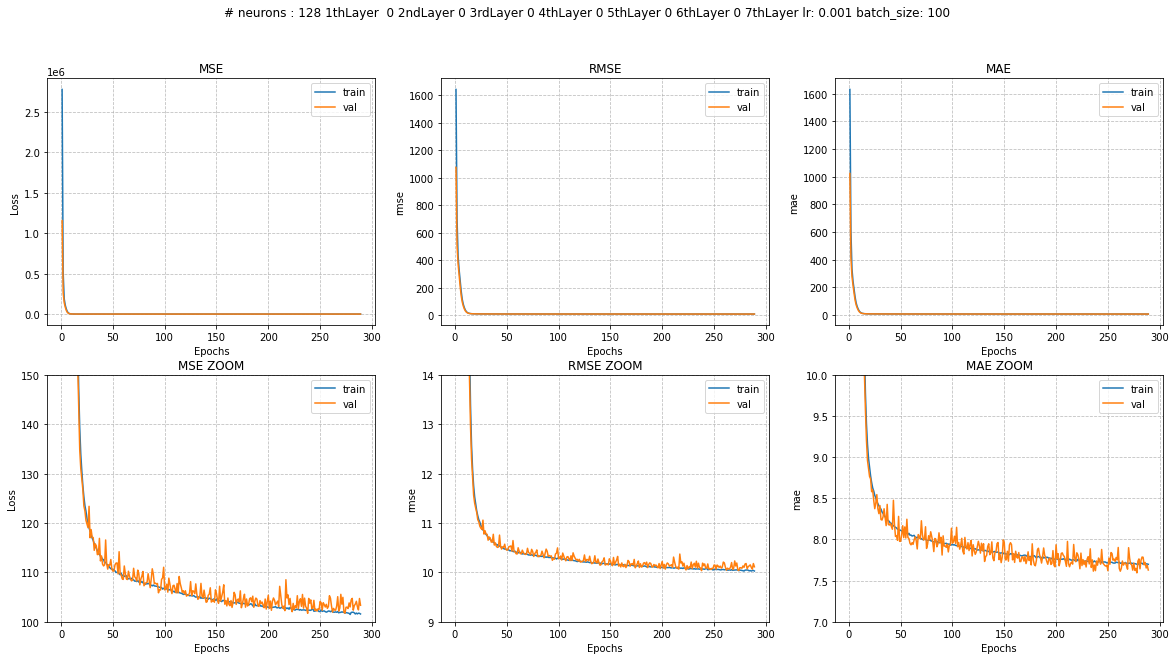

In [0]:
plot_validation_results(history, model_parameters, fit_parameters) # ottimizzatore Adam

Per confrontare gli ottimizzatori, proviamo a utilizzare la stessa struttura di rete con ottimizzatore Rmsprop

In [0]:
model_parameters = {
    'first_layer_neurons_number': 128, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 100, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition,
    'validation_data': (X_val, y_val)
}

history =  result_fit(model_parameters, fit_parameters, data)

Train on 120900 samples, validate on 13434 samples
Epoch 1/1500
120900/120900 [==============================] - 4s 34us/step - loss: 3235138.5318 - rmse: 1791.5935 - mae: 1788.7792 - val_loss: 2087894.0912 - val_rmse: 1445.0112 - val_mae: 1430.2455
Epoch 2/1500
120900/120900 [==============================] - 4s 34us/step - loss: 957948.8623 - rmse: 941.1606 - mae: 868.6001 - val_loss: 332567.1687 - val_rmse: 575.3904 - val_mae: 477.6233
Epoch 3/1500
120900/120900 [==============================] - 4s 33us/step - loss: 200496.2575 - rmse: 441.2325 - mae: 338.3056 - val_loss: 116691.6843 - val_rmse: 339.9176 - val_mae: 250.2202
Epoch 4/1500
120900/120900 [==============================] - 4s 33us/step - loss: 71930.5323 - rmse: 263.4517 - mae: 195.8588 - val_loss: 37517.1046 - val_rmse: 191.7203 - val_mae: 144.1541
Epoch 5/1500
120900/120900 [==============================] - 4s 34us/step - loss: 17548.2522 - rmse: 125.2963 - mae: 93.0503 - val_loss: 5188.5482 - val_rmse: 68.4494 - val

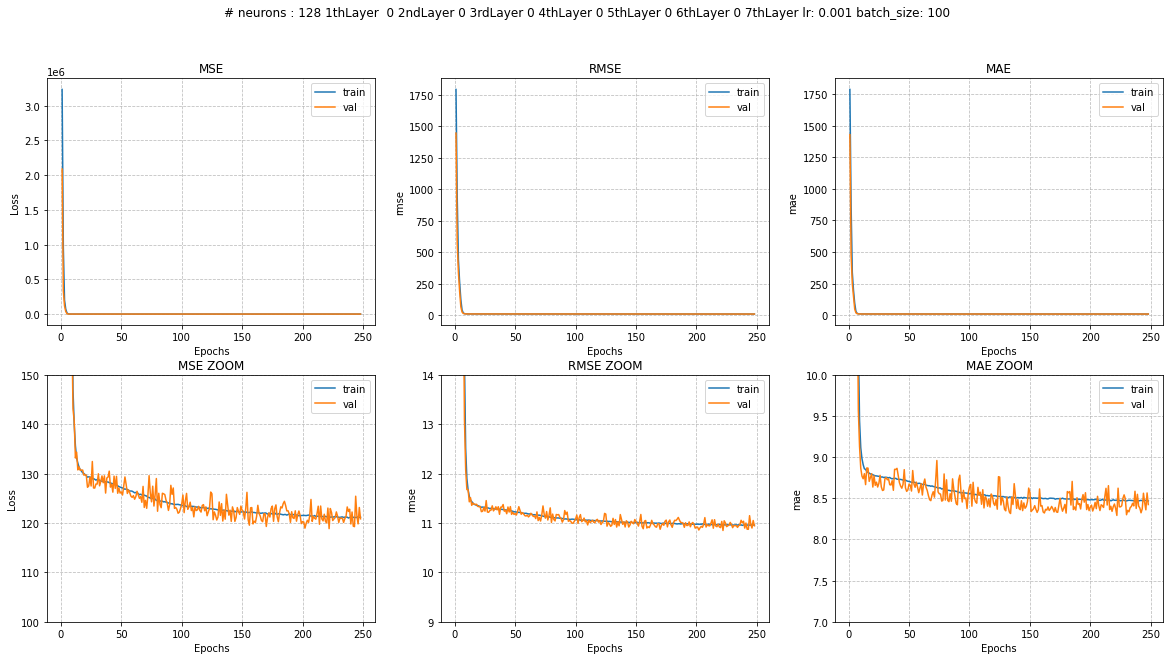

In [0]:
plot_validation_results(history, model_parameters, fit_parameters) # ottimizzatore RmsProp

Abbiamo fatto varie prove, sempre con ottimizzatore Adam, aumentando e diminuendo il numero di neuroni. La struttura migliore risulta essere questa con 98 neuroni.

In [0]:
model_parameters = {
    'first_layer_neurons_number': 98, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 100, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition,
    'validation_data': (X_val, y_val)
}

history =  result_fit_adam(model_parameters, fit_parameters, data)

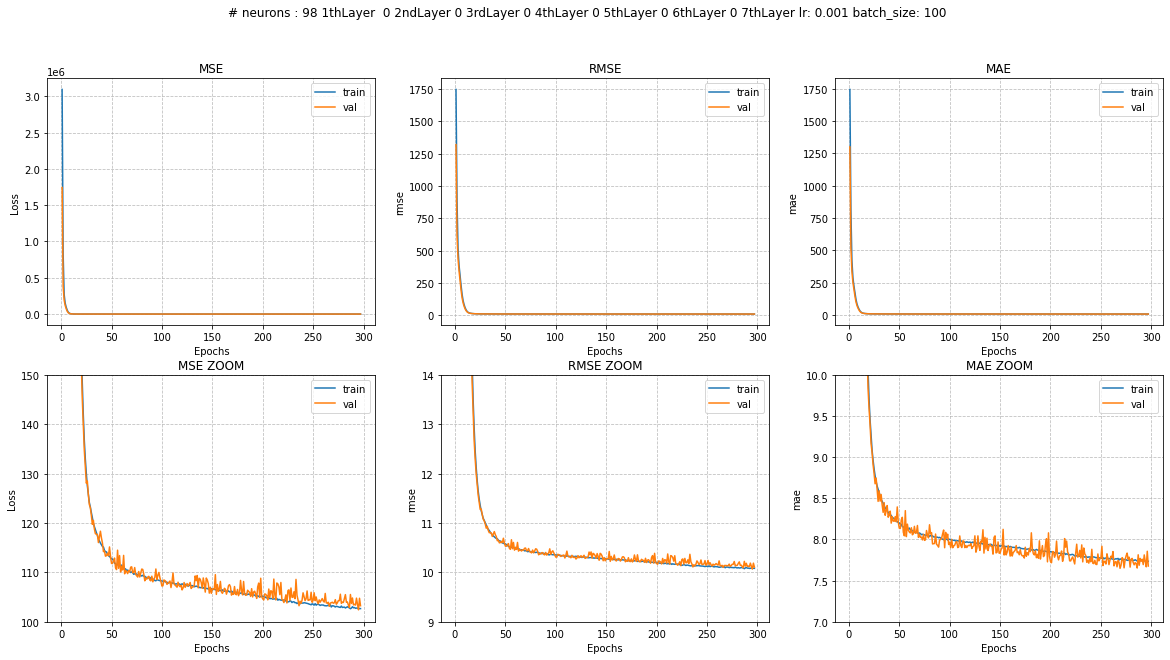

In [0]:
plot_validation_results(history, model_parameters, fit_parameters) # ottimizzatore Adam

## Test sulla Rete

Scegliamo come modello su cui fare il test rete un layer 98 neuroni, ottimizzatore adam, lr 0.001, bs 100

In [0]:
 model_parameters = {
    'first_layer_neurons_number': 98, 
    'second_layer_neurons_number': 0, 
    'third_layer_neurons_number': 0, 
    'fourth_layer_neurons_number': 0,
    'fifth_layer_neurons_number': 0,
    'sixth_layer_neurons_number': 0,
    'seventh_layer_neurons_number': 0,
    'lr':0.001, # partenza 0.001
    'features_number': X_train.shape[1],
    'activation':'relu'
}

fit_parameters = {
    'epochs': 1500,
    'batch_size': 100, 
    'verbose': 1,
    'callbacks': [callback]
}

data ={
    'x': X_train_partition,
    'y': y_train_partition
    # 'validation_data': (X_val, y_val)
}


model = build_model_adam(**model_parameters)
model.fit(X_train_partition, y_train_partition, **fit_parameters)

Epoch 1/1500
120900/120900 [==============================] - 2s 13us/step - loss: 3101796.1084 - rmse: 1749.6456 - mae: 1745.1938
Epoch 2/1500
120900/120900 [==============================] - 1s 11us/step - loss: 858620.8339 - rmse: 902.8853 - mae: 824.5802
Epoch 3/1500
120900/120900 [==============================] - 1s 11us/step - loss: 287469.7674 - rmse: 532.5006 - mae: 434.5668
Epoch 4/1500
120900/120900 [==============================] - 1s 11us/step - loss: 155631.3156 - rmse: 392.0449 - mae: 290.9713
Epoch 5/1500
120900/120900 [==============================] - 1s 11us/step - loss: 96409.4157 - rmse: 308.2759 - mae: 224.8100
Epoch 6/1500
120900/120900 [==============================] - 1s 12us/step - loss: 55759.1980 - rmse: 233.8159 - mae: 172.2607
Epoch 7/1500
120900/120900 [==============================] - 1s 12us/step - loss: 28011.8154 - rmse: 165.0647 - mae: 122.7467
Epoch 8/1500
120900/120900 [==============================] - 1s 11us/step - loss: 13348.4092 - rmse: 11

In [0]:
mse_score, rmse_score, mae_score = model.evaluate(X_test_norm, y_test)

print('Evaluation Results:\nmse: {}\nrmse: {}\nmae: {}'
.format(mse_score, rmse_score, mae_score))

33584/33584 [==============================] - 1s 17us/step
Evaluation Results:
mse: 100.51522974720338
rmse: 9.886079788208008
mae: 7.63435697555542


In [0]:
y_pred_NN = model.predict(X_test_norm)

In [0]:
np.array(y_test)

df_results_NN = pd.DataFrame(np.array(y_test), columns=['year'])
df_results_NN['predicted year']= y_pred_NN

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


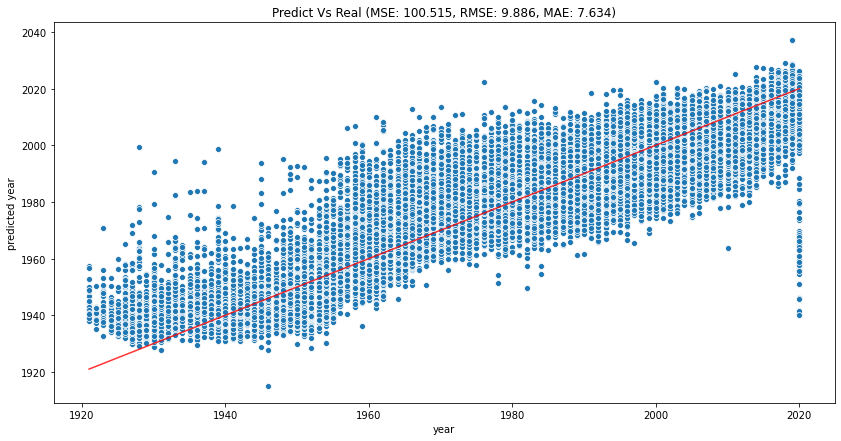

In [0]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='year', y='predicted year', data=df_results_NN)
plt.plot([1921, 2020], [1921, 2020], c='red', linewidth=1.5, alpha=0.8)
plt.title('Predict Vs Real (MSE: {}, RMSE: {}, MAE: {})'.format(round(mse_score,3),round(rmse_score,3), round(mae_score,3)))

plt.show()

In [0]:
df_results_NN.head(2)

,year,predicted year
0,2019.0,2017.024658
1,1979.0,1967.455078


In [0]:
df_results_NN['residual']=df_results_NN['year']-df_results_NN['predicted year']

In [0]:
scaler = StandardScaler()
y = df_results_NN[['predicted year']].values
scaler.fit(y)
y_stand_NN = scaler.transform(y)
df_results_NN['predicted_stand']= y_stand_NN
 
#stand residuals

resid_NN = df_results_NN[['residual']].values
scaler.fit(resid_NN)
resid_stand_NN = scaler.transform(resid_NN)
df_results_NN['residual_stand_NN'] = resid_stand_NN
 
df_results_NN.head(2)

,year,predicted year,residual,predicted_stand,residual_stand_NN
0,2019.0,2017.024658,1.975342,1.695945,0.196571
1,1979.0,1967.455078,11.544922,-0.426740,1.151073


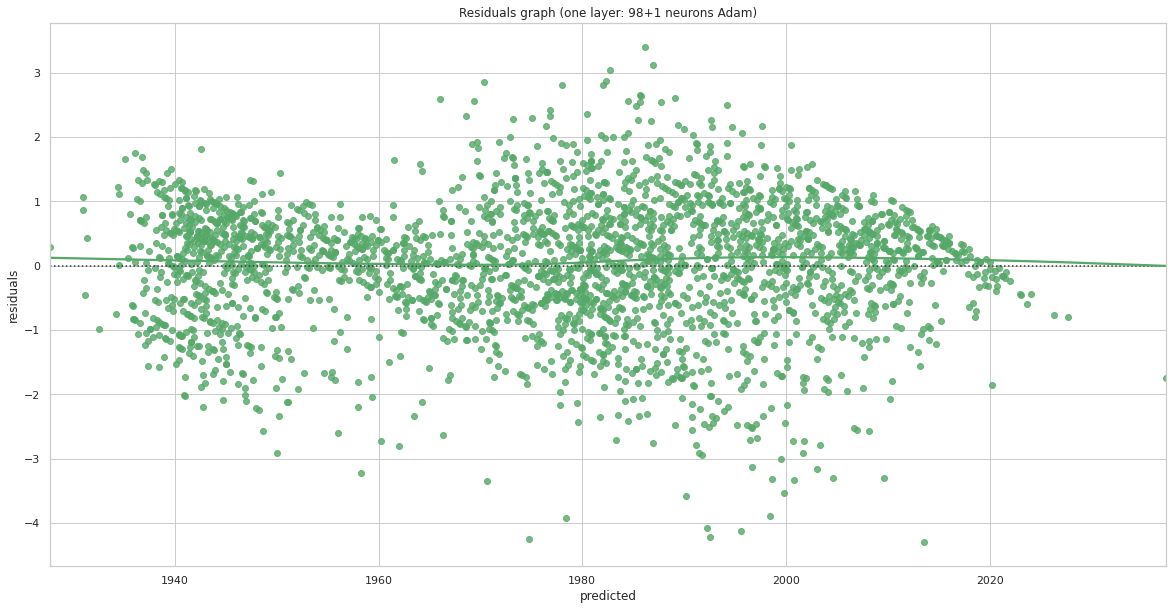

In [0]:
sns.set(style="whitegrid")
 
sample_NN = df_results_NN.sample(frac=0.08)
 
# Plot the residuals after fitting a linear model
plt.figure(figsize=(20, 10))
ax = sns.residplot(x='predicted year', y='residual_stand_NN', data=sample_NN, lowess=True, color="g")
ax.set(xlabel='predicted', ylabel='residuals')
plt.title('Residuals graph (one layer: 98+1 neurons Adam)')
plt.show()

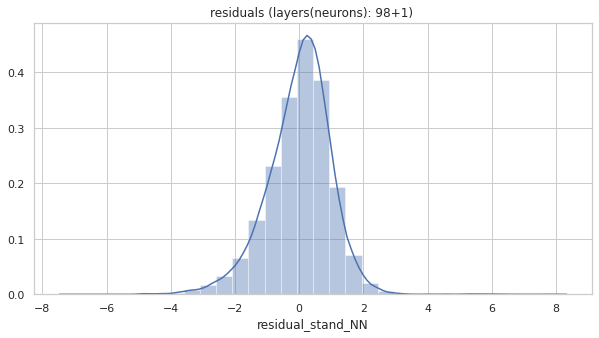

In [0]:
plt.figure(figsize=(10, 5))
sns.distplot(df_results_NN['residual_stand_NN'], bins =30)
plt.title('residuals (layers(neurons): 98+1) ')
plt.show()